In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
import itertools
import statsmodels.api as sm

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing 
import statsmodels.graphics.tsaplots as tsa_plots

In [2]:
df= pd.read_excel("/content/PJMW_MW_Hourly (1).xlsx", header=0, index_col=0, parse_dates=True)

In [3]:
df.shape

(143206, 1)

In [4]:
df.head()

PJMW_MW
Datetime                    
2002-12-31 01:00:00     5077
2002-12-31 02:00:00     4939
2002-12-31 03:00:00     4885
2002-12-31 04:00:00     4857
2002-12-31 05:00:00     4930

In [5]:
df.tail()

PJMW_MW
Datetime                    
2018-01-01 20:00:00     8401
2018-01-01 21:00:00     8373
2018-01-01 22:00:00     8238
2018-01-01 23:00:00     7958
2018-01-02 00:00:00     7691

In [6]:


df.shape


(143206, 1)

In [7]:


df.dtypes


PJMW_MW    int64
dtype: object

In [8]:


df.describe()



PJMW_MW
count  143206.000000
mean     5602.375089
std       979.142872
min       487.000000
25%      4907.000000
50%      5530.000000
75%      6252.000000
max      9594.000000

In [9]:


df = df.sort_index()



In [10]:


df.head()



PJMW_MW
Datetime                    
2002-04-01 01:00:00     4374
2002-04-01 02:00:00     4306
2002-04-01 03:00:00     4322
2002-04-01 04:00:00     4359
2002-04-01 05:00:00     4436

In [11]:


df.tail()



PJMW_MW
Datetime                    
2018-08-02 20:00:00     6545
2018-08-02 21:00:00     6496
2018-08-02 22:00:00     6325
2018-08-02 23:00:00     5892
2018-08-03 00:00:00     5489

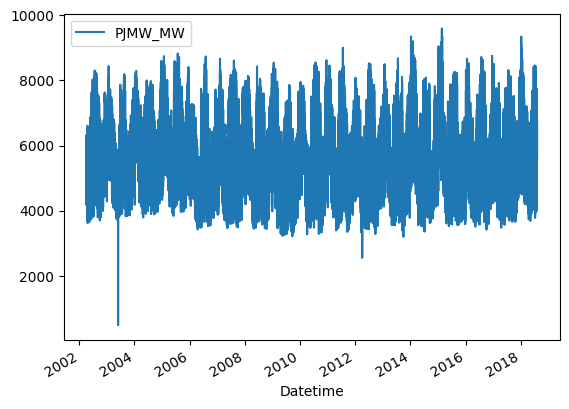

In [12]:
df.plot()
plt.show()

array([[<Axes: title={'center': 'PJMW_MW'}>]], dtype=object)

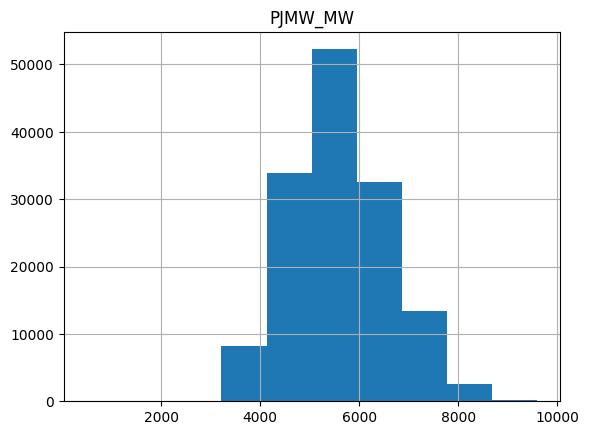

In [13]:
df.hist()

<Axes: xlabel='Datetime'>

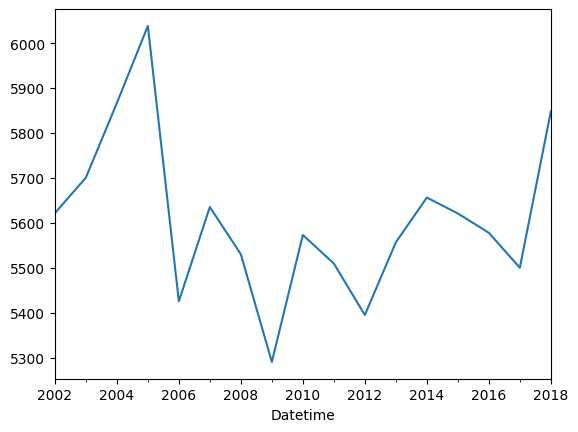

In [14]:


df.PJMW_MW.resample(rule='A').mean().plot()



<Axes: xlabel='Datetime'>

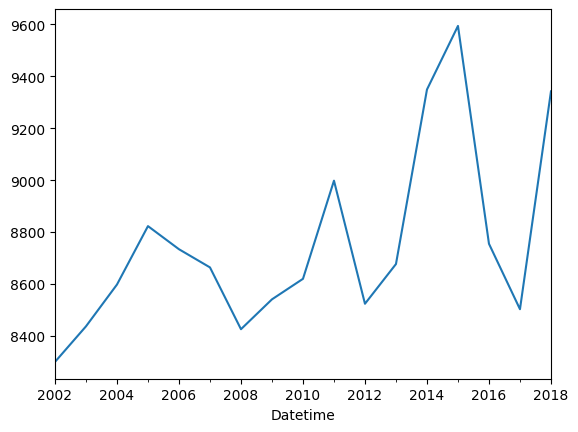

In [15]:
df.PJMW_MW.resample(rule='A').max().plot()

<Axes: xlabel='Datetime'>

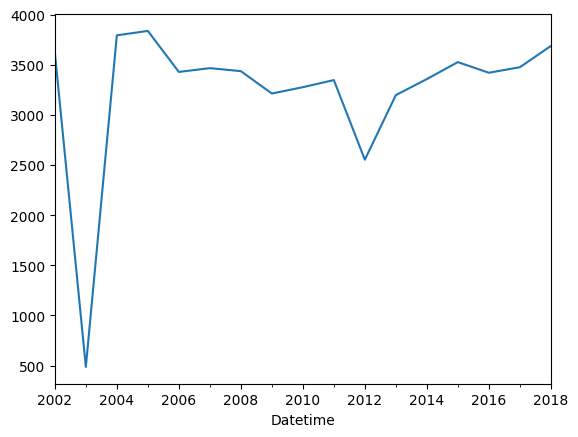

In [16]:


df.PJMW_MW.resample(rule='A').min().plot()



In [17]:
df['2003'].PJMW_MW.resample(rule='A').min()

<ipython-input-17-6e2121c0a1a6>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df['2003'].PJMW_MW.resample(rule='A').min()


Datetime
2003-12-31    487
Freq: A-DEC, Name: PJMW_MW, dtype: int64

In [18]:
df[df['PJMW_MW']==487.0]

PJMW_MW
Datetime           
2003-05-29      487

In [19]:
df['2003-05-29'].head()


<ipython-input-19-c39cef10c2e1>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df['2003-05-29'].head()


PJMW_MW
Datetime                    
2003-05-29 00:00:00      487
2003-05-29 01:00:00     4560
2003-05-29 02:00:00     4424
2003-05-29 03:00:00     4351
2003-05-29 04:00:00     4337

In [20]:


df['PJMW_MW'].mask(df['PJMW_MW']<500,inplace=True)



In [21]:


df['PJMW_MW']=df.PJMW_MW.interpolate(method='linear')



In [22]:


df['2003-05-29'].head()



<ipython-input-22-8644afaee523>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df['2003-05-29'].head()


PJMW_MW
Datetime                    
2003-05-29 00:00:00   4938.5
2003-05-29 01:00:00   4560.0
2003-05-29 02:00:00   4424.0
2003-05-29 03:00:00   4351.0
2003-05-29 04:00:00   4337.0

<Axes: xlabel='Datetime'>

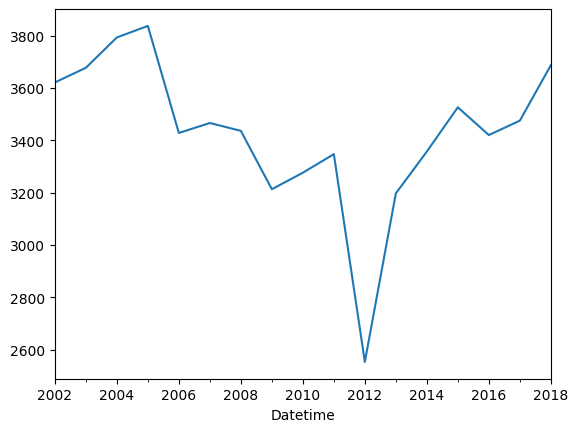

In [23]:
df.PJMW_MW.resample(rule='A').min().plot()

In [24]:


df[df['PJMW_MW']==2553.0]



PJMW_MW
Datetime           
2012-04-02   2553.0

In [25]:


df['2012-04-02'].head()



<ipython-input-25-3e68d36e7f49>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df['2012-04-02'].head()


PJMW_MW
Datetime                    
2012-04-02 00:00:00   2553.0
2012-04-02 01:00:00   3904.0
2012-04-02 02:00:00   3779.0
2012-04-02 03:00:00   3776.0
2012-04-02 04:00:00   3764.0

In [26]:


df.to_csv('dataset.csv')



In [27]:


type(df)



pandas.core.frame.DataFrame

In [28]:
df1=df.copy()

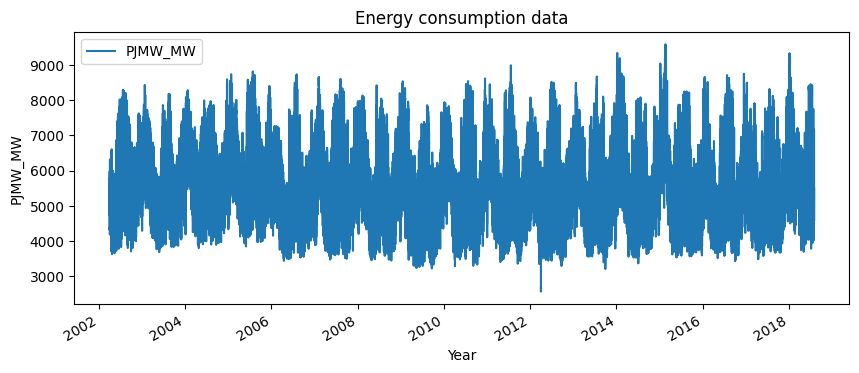

In [29]:


plt.rcParams["figure.figsize"]= (10,4)
df1.plot()
plt.xlabel('Year') 
plt.ylabel('PJMW_MW') 
# displaying the title
plt.title("Energy consumption data")
plt.show()



In [30]:


df1



PJMW_MW
Datetime                    
2002-04-01 01:00:00   4374.0
2002-04-01 02:00:00   4306.0
2002-04-01 03:00:00   4322.0
2002-04-01 04:00:00   4359.0
2002-04-01 05:00:00   4436.0
...                      ...
2018-08-02 20:00:00   6545.0
2018-08-02 21:00:00   6496.0
2018-08-02 22:00:00   6325.0
2018-08-02 23:00:00   5892.0
2018-08-03 00:00:00   5489.0

[143206 rows x 1 columns]

In [31]:


df1["Date"] = pd.to_datetime(df1.index,format='%Y-%m-%d %H:%M')

# Extracting Day, month name, year from the Datetime column using Date functions from pandas 

df1["month"] = df1.Date.dt.strftime("%b") # month extraction
df1["year"] = df1.Date.dt.strftime("%Y") # year extraction
df1["day"] = df1.Date.dt.strftime("%d") # day extraction
df1["Hour"] = df1.Date.dt.strftime("%H") # Hour extraction



In [32]:
df1

PJMW_MW                Date month  year day Hour
Datetime                                                             
2002-04-01 01:00:00   4374.0 2002-04-01 01:00:00   Apr  2002  01   01
2002-04-01 02:00:00   4306.0 2002-04-01 02:00:00   Apr  2002  01   02
2002-04-01 03:00:00   4322.0 2002-04-01 03:00:00   Apr  2002  01   03
2002-04-01 04:00:00   4359.0 2002-04-01 04:00:00   Apr  2002  01   04
2002-04-01 05:00:00   4436.0 2002-04-01 05:00:00   Apr  2002  01   05
...                      ...                 ...   ...   ...  ..  ...
2018-08-02 20:00:00   6545.0 2018-08-02 20:00:00   Aug  2018  02   20
2018-08-02 21:00:00   6496.0 2018-08-02 21:00:00   Aug  2018  02   21
2018-08-02 22:00:00   6325.0 2018-08-02 22:00:00   Aug  2018  02   22
2018-08-02 23:00:00   5892.0 2018-08-02 23:00:00   Aug  2018  02   23
2018-08-03 00:00:00   5489.0 2018-08-03 00:00:00   Aug  2018  03   00

[143206 rows x 6 columns]

In [33]:


df1.drop('Date',axis=1,inplace=True)



In [34]:
df1['weekday_name'] = pd.to_datetime(df1.index).day_name()

In [35]:


df1



PJMW_MW month  year day Hour weekday_name
Datetime                                                      
2002-04-01 01:00:00   4374.0   Apr  2002  01   01       Monday
2002-04-01 02:00:00   4306.0   Apr  2002  01   02       Monday
2002-04-01 03:00:00   4322.0   Apr  2002  01   03       Monday
2002-04-01 04:00:00   4359.0   Apr  2002  01   04       Monday
2002-04-01 05:00:00   4436.0   Apr  2002  01   05       Monday
...                      ...   ...   ...  ..  ...          ...
2018-08-02 20:00:00   6545.0   Aug  2018  02   20     Thursday
2018-08-02 21:00:00   6496.0   Aug  2018  02   21     Thursday
2018-08-02 22:00:00   6325.0   Aug  2018  02   22     Thursday
2018-08-02 23:00:00   5892.0   Aug  2018  02   23     Thursday
2018-08-03 00:00:00   5489.0   Aug  2018  03   00       Friday

[143206 rows x 6 columns]

In [36]:


df2=df1.copy()



In [37]:


df2.index.name= 'Datetime'



In [38]:


df2



PJMW_MW month  year day Hour weekday_name
Datetime                                                      
2002-04-01 01:00:00   4374.0   Apr  2002  01   01       Monday
2002-04-01 02:00:00   4306.0   Apr  2002  01   02       Monday
2002-04-01 03:00:00   4322.0   Apr  2002  01   03       Monday
2002-04-01 04:00:00   4359.0   Apr  2002  01   04       Monday
2002-04-01 05:00:00   4436.0   Apr  2002  01   05       Monday
...                      ...   ...   ...  ..  ...          ...
2018-08-02 20:00:00   6545.0   Aug  2018  02   20     Thursday
2018-08-02 21:00:00   6496.0   Aug  2018  02   21     Thursday
2018-08-02 22:00:00   6325.0   Aug  2018  02   22     Thursday
2018-08-02 23:00:00   5892.0   Aug  2018  02   23     Thursday
2018-08-03 00:00:00   5489.0   Aug  2018  03   00       Friday

[143206 rows x 6 columns]

<Axes: xlabel='Datetime'>

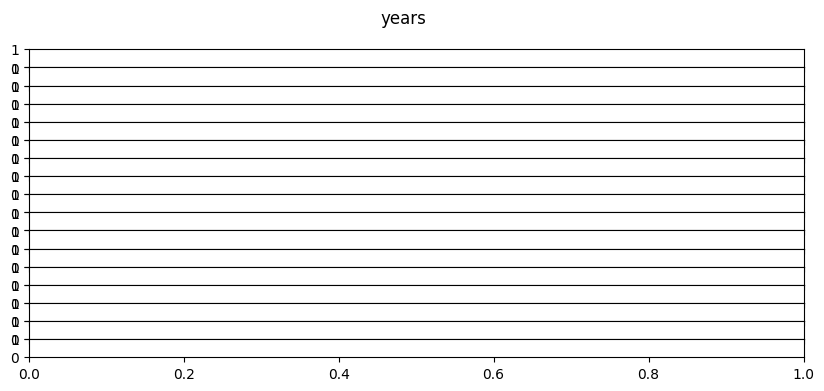

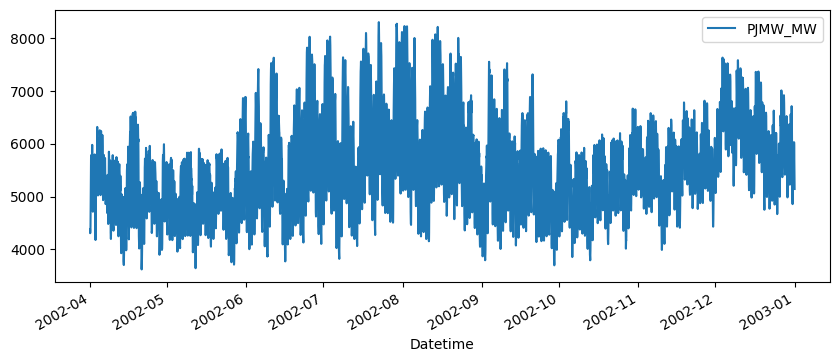

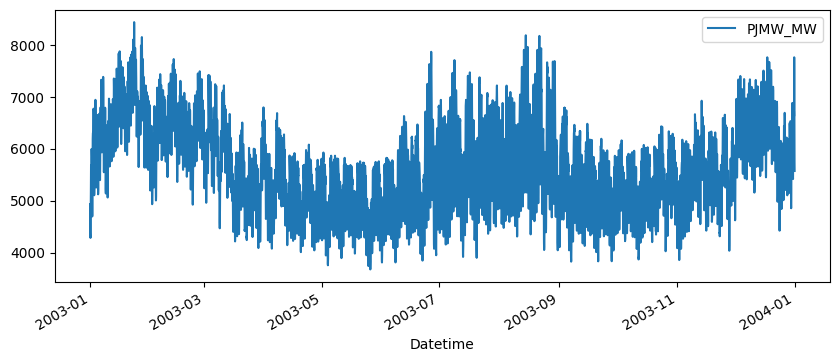

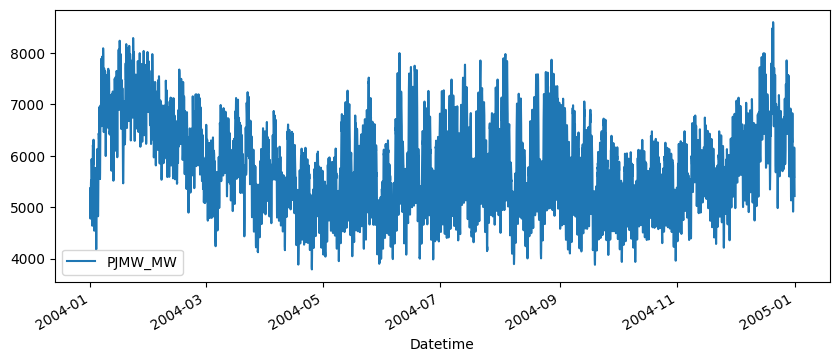

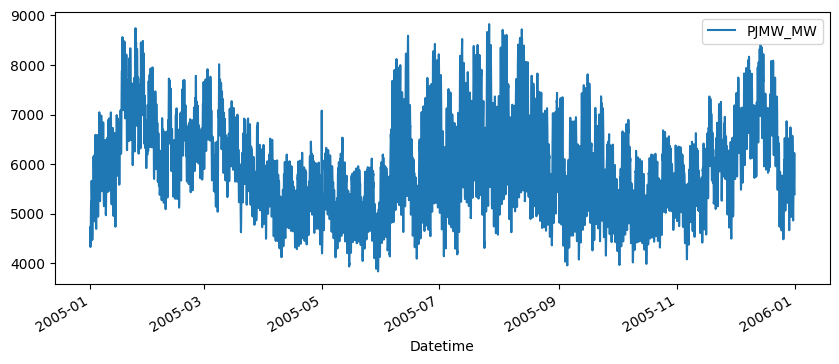

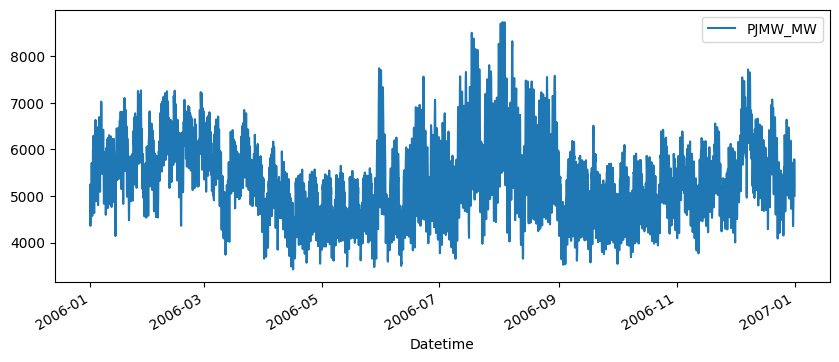

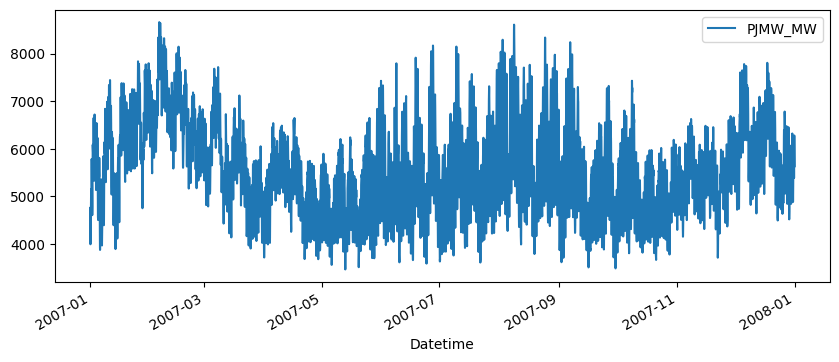

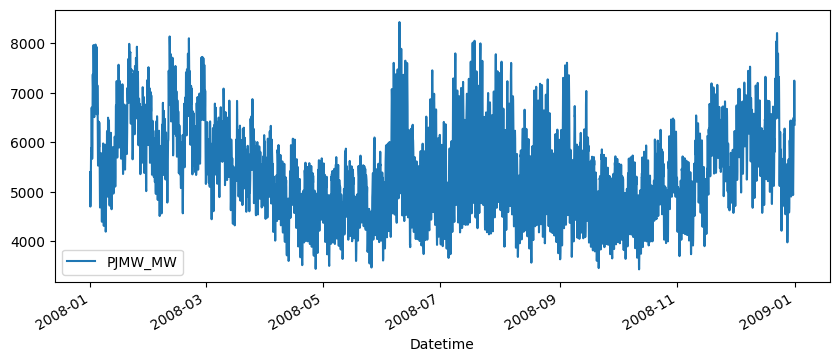

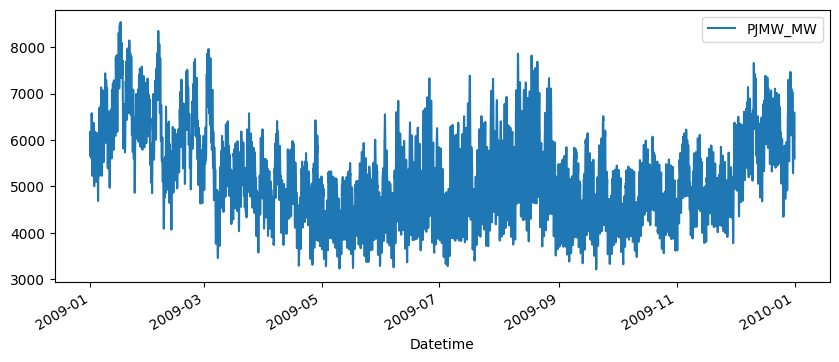

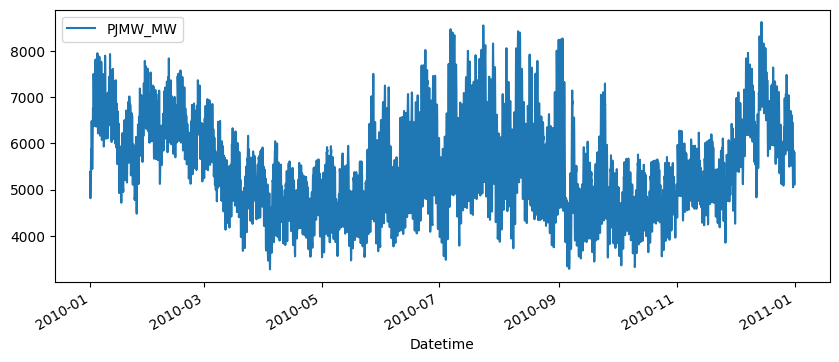

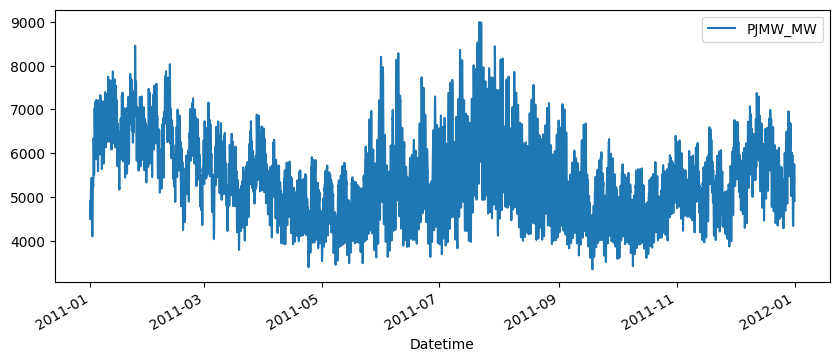

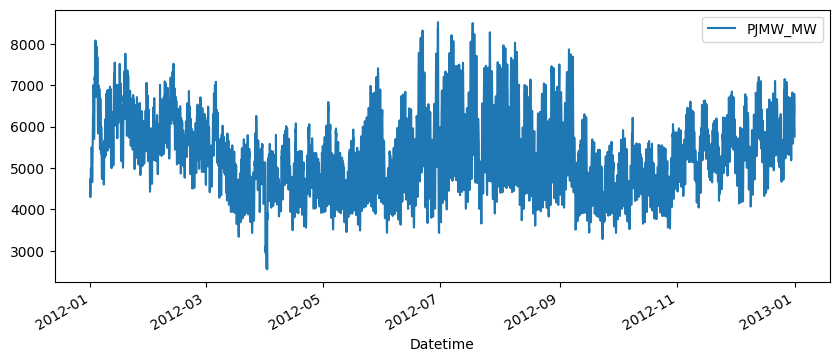

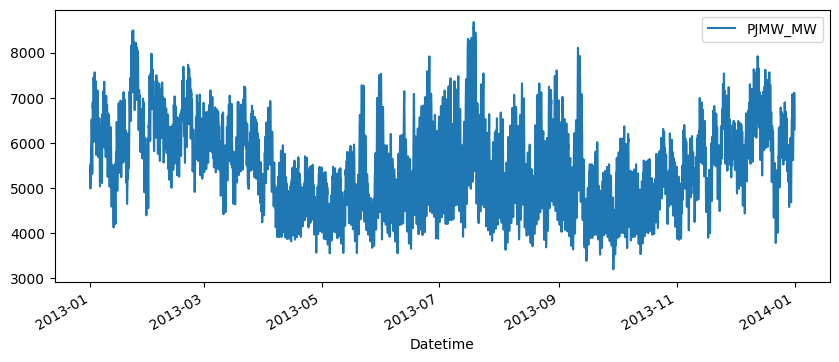

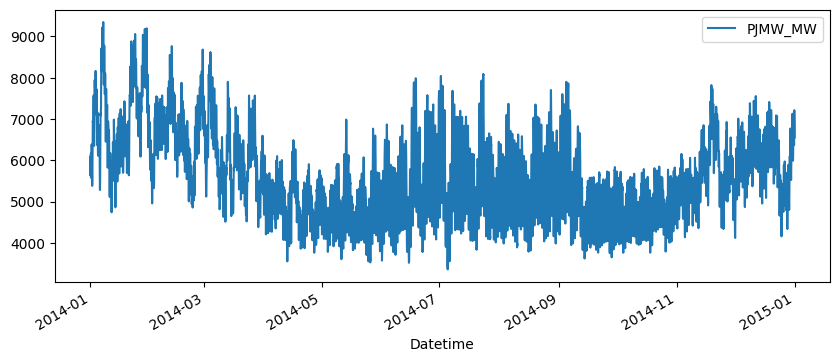

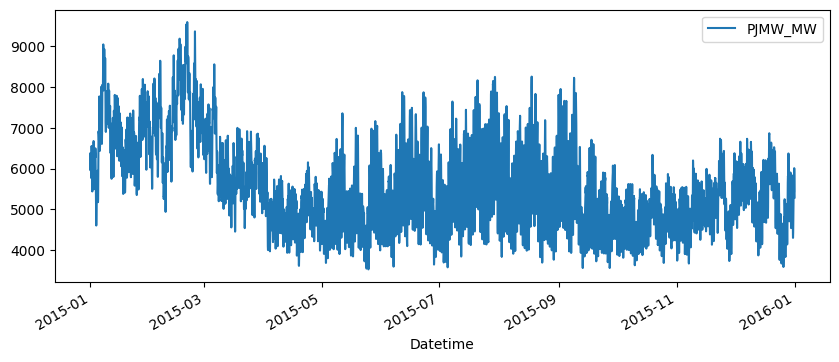

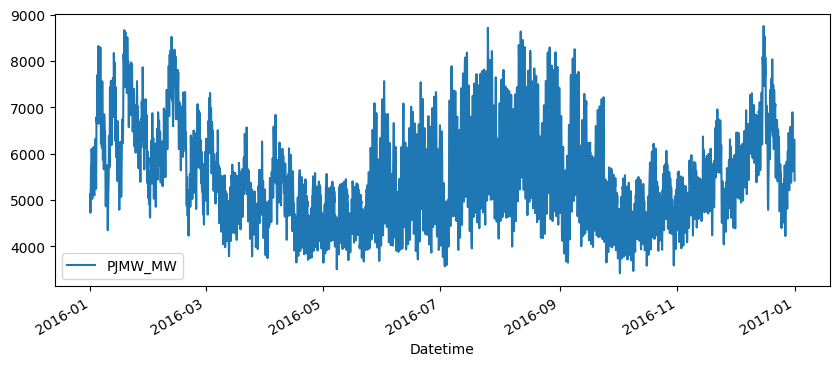

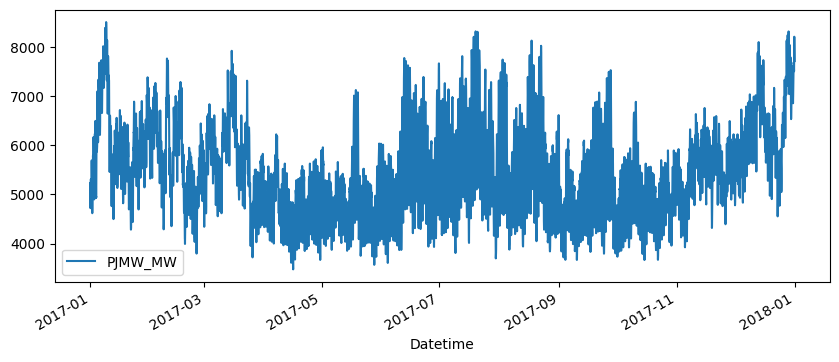

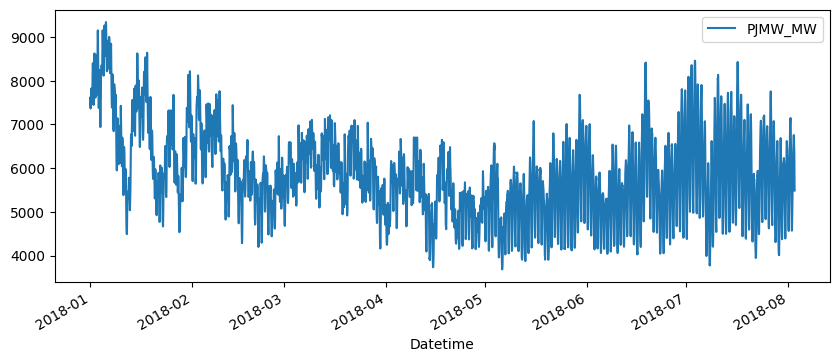

In [39]:


fig = plt.figure()
gs = fig.add_gridspec(17, hspace=0)
axs = gs.subplots(sharex=True, sharey=True)
fig.suptitle('years')
df.loc['2002'].plot()
df.loc['2003'].plot()
df.loc['2004'].plot()
df.loc['2005'].plot()
df.loc['2006'].plot()
df.loc['2007'].plot()
df.loc['2008'].plot()
df.loc['2009'].plot()
df.loc['2010'].plot()
df.loc['2011'].plot()
df.loc['2012'].plot()
df.loc['2013'].plot()
df.loc['2014'].plot()
df.loc['2015'].plot()
df.loc['2016'].plot()
df.loc['2017'].plot()
df.loc['2018'].plot()



In [40]:
df2.describe()

PJMW_MW
count  143206.000000
mean     5602.406174
std       979.051131
min      2553.000000
25%      4907.000000
50%      5530.000000
75%      6252.000000
max      9594.000000

Text(0.5, 1.0, 'Yearly trend')

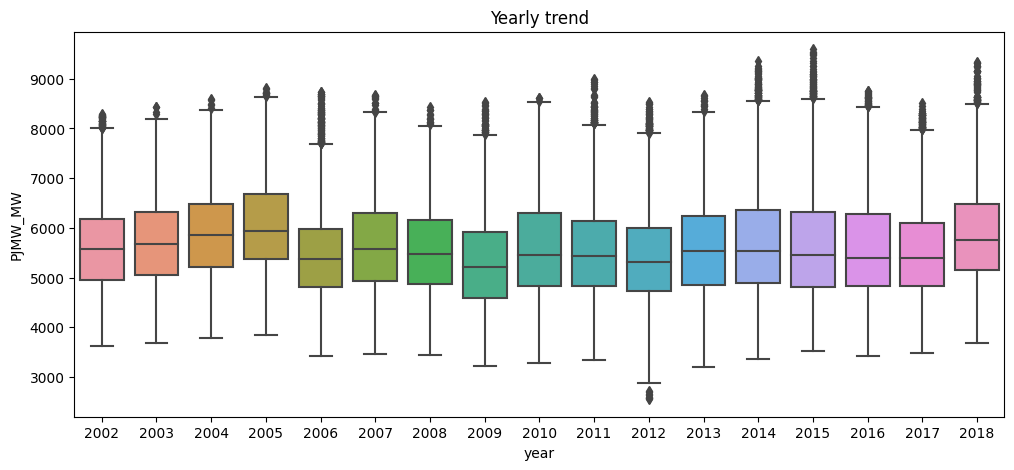

In [41]:


fig, ax = plt.subplots(figsize=(12,5))
sns.boxplot(x = df2.year,
                y = df2['PJMW_MW'], 
                ax = ax)
ax.set_title('Yearly trend')



Text(0.5, 1.0, 'Monthly trend')

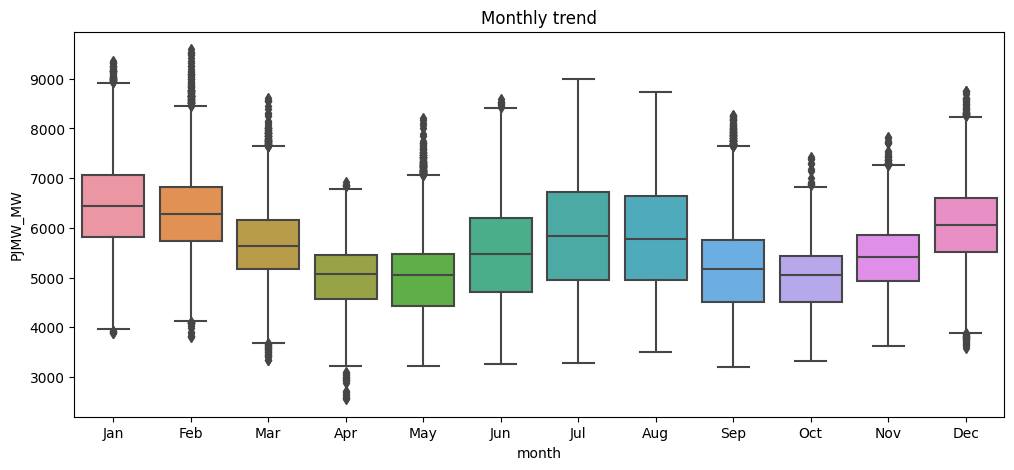

In [42]:
fig, ax = plt.subplots(figsize=(12,5))
sns.boxplot(x = df2.month,
                y = df2['PJMW_MW'], order=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],
                ax = ax)
ax.set_title('Monthly trend')

In [43]:


df3=df2.copy()



In [44]:


df3['season']=df3['month'].copy()



In [45]:
df3['season']=df3['season'].map({'Jan':'Winter','Feb':'Winter','Mar':'Winter','Apr':'Spring','May':'Spring','Jun':'Spring','Aug':'Summer','Sep':'Summer','Jul':'Summer','Oct': 'Fall','Nov': 'Fall','Dec': 'Fall'})

In [46]:
df3.head()

PJMW_MW month  year day Hour weekday_name  season
Datetime                                                              
2002-04-01 01:00:00   4374.0   Apr  2002  01   01       Monday  Spring
2002-04-01 02:00:00   4306.0   Apr  2002  01   02       Monday  Spring
2002-04-01 03:00:00   4322.0   Apr  2002  01   03       Monday  Spring
2002-04-01 04:00:00   4359.0   Apr  2002  01   04       Monday  Spring
2002-04-01 05:00:00   4436.0   Apr  2002  01   05       Monday  Spring

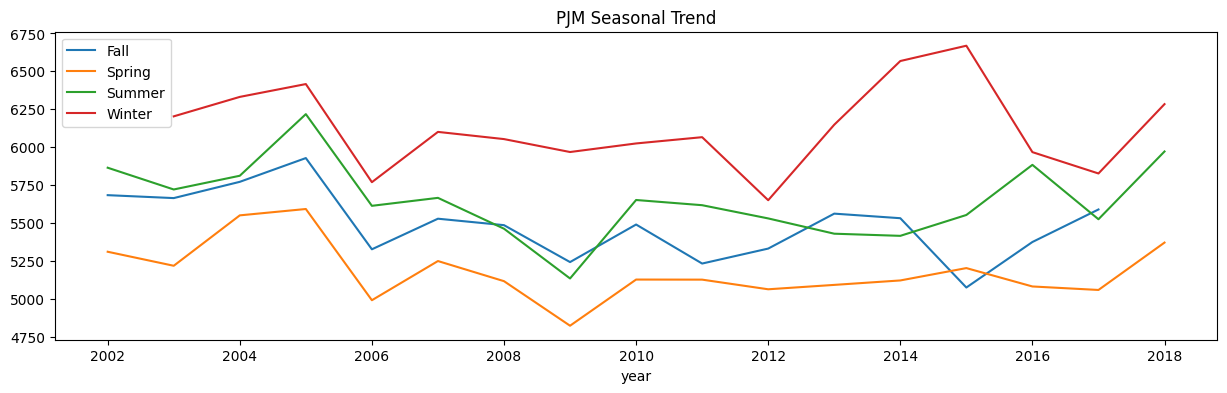

In [47]:


df3.pivot_table(index=df3['year'], 
                     columns='season', 
                     values='PJMW_MW',
                     aggfunc='mean').plot(figsize=(15,4),
                     title='PJM Seasonal Trend')
plt.legend(loc='upper left')



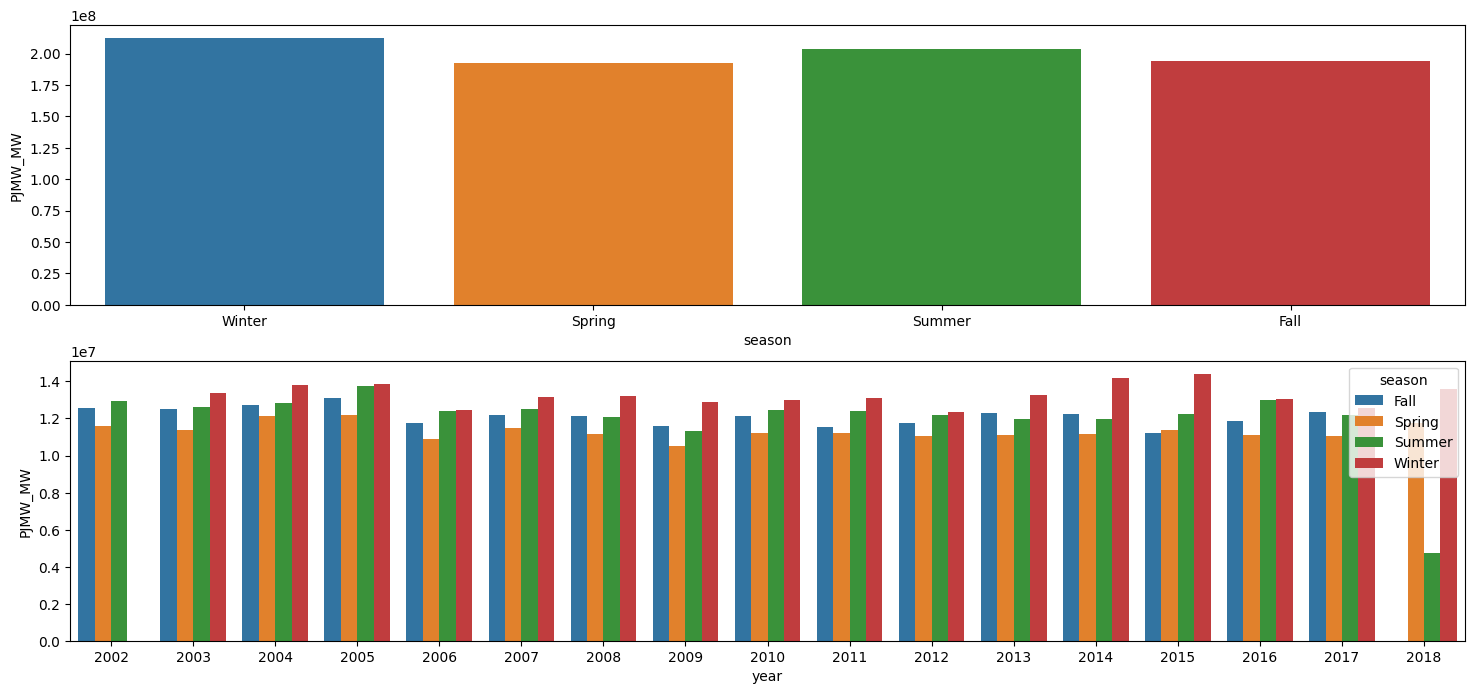

In [48]:
plt.figure(figsize=(18,8))
aux1 = df3[['season', 'PJMW_MW']].groupby( 'season' ).sum().reset_index()
plt.subplot( 2, 1, 1 )
sns.barplot( x='season', y='PJMW_MW', data=aux1, order=['Winter', 'Spring', 'Summer', 'Fall'] )

aux2 = df3[['year', 'season', 'PJMW_MW']].groupby( ['year', 'season'] ).sum().reset_index()
plt.subplot( 2, 1, 2 )
sns.barplot( x='year', y='PJMW_MW', hue='season', data=aux2 );

<Axes: xlabel='month', ylabel='year'>

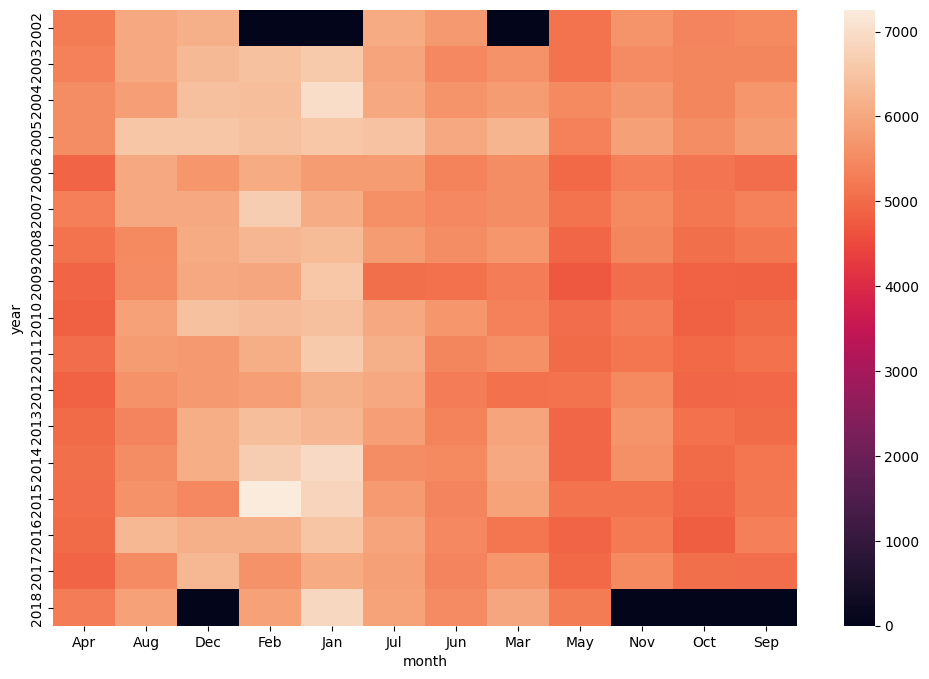

In [49]:
plt.figure(figsize=(12,8))
heatmap = pd.pivot_table(data=df2,values="PJMW_MW",index="year",columns="month",aggfunc="median",fill_value=0)
sns.heatmap(heatmap ,fmt="g")

Text(0.5, 1.0, 'Daily trend - Hourly basis')

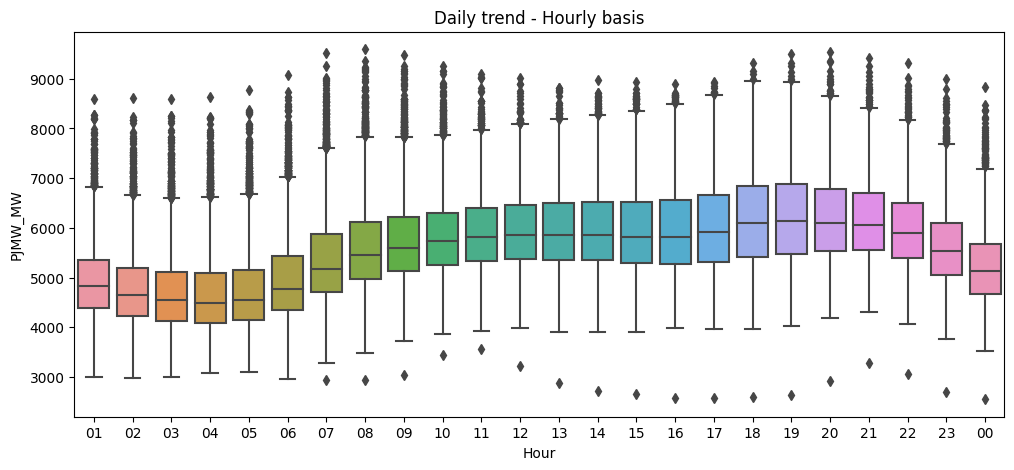

In [50]:


fig, ax = plt.subplots(figsize=(12,5))
sns.boxplot(x = df2.Hour,
                y = df2['PJMW_MW'], 
                ax = ax)
ax.set_title('Daily trend - Hourly basis')



<Axes: xlabel='day', ylabel='PJMW_MW'>

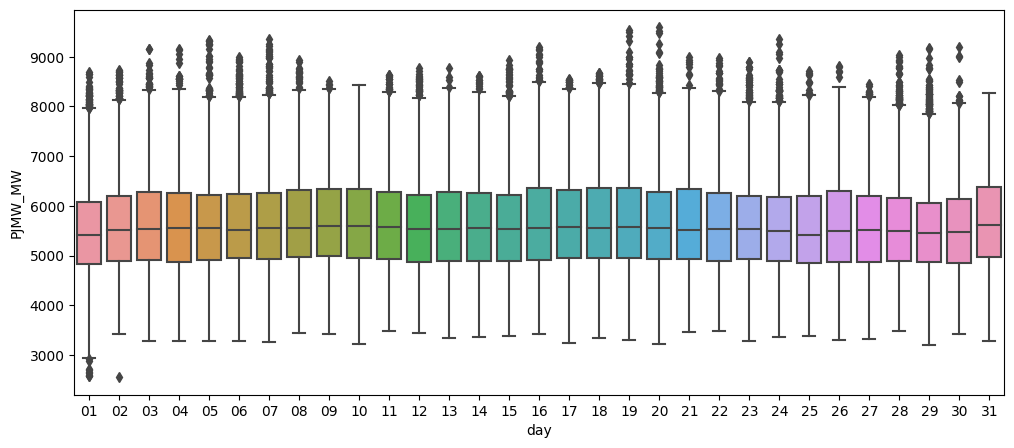

In [51]:
fig, ax = plt.subplots(figsize=(12,5))
sns.boxplot(x = df2.day,
                y = df2['PJMW_MW'],
                ax = ax)

<Axes: xlabel='weekday_name', ylabel='PJMW_MW'>

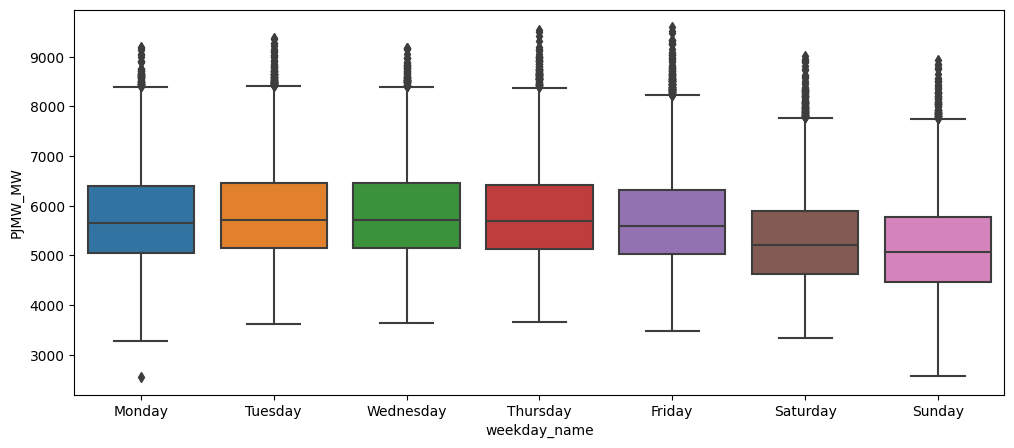

In [52]:


fig, ax = plt.subplots(figsize=(12,5))
sns.boxplot(x = df2.weekday_name,
                y = df2['PJMW_MW'],order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],
                ax = ax)



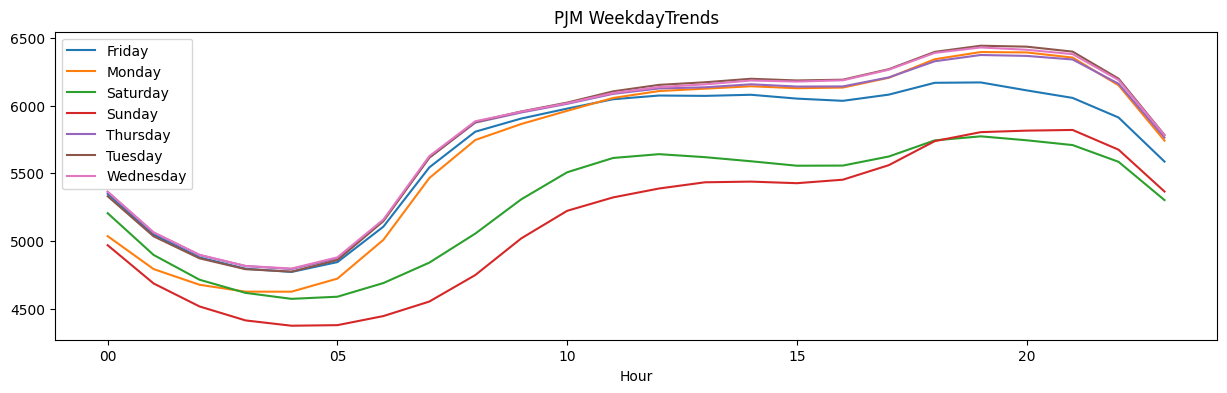

In [53]:
df2.pivot_table(index=df2['Hour'], 
                     columns='weekday_name', 
                     values='PJMW_MW',
                     aggfunc='mean').plot(figsize=(15,4),
                     title='PJM WeekdayTrends')
plt.legend(loc='upper left')

In [54]:


df3['date'] = df3.index.date



In [55]:


df4=df3.reset_index()



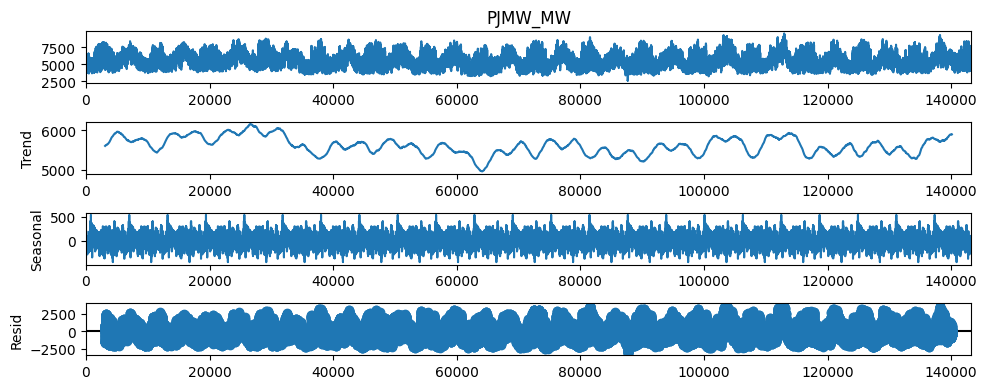

In [56]:


decompose = seasonal_decompose(df4.PJMW_MW,period=6205)
decompose.plot()
plt.show()



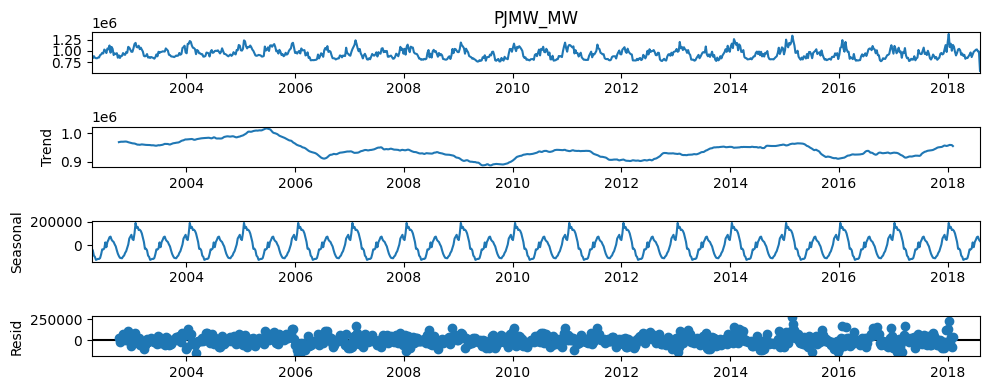

In [57]:


plt.rcParams["figure.figsize"]= (10,4)
weekly_data = df2.PJMW_MW.resample(rule='W').sum()
decomposition = seasonal_decompose(weekly_data, model='additive') # Aggregate to weekly level
fig = decomposition.plot()
plt.show()



In [58]:


from statsmodels.stats.diagnostic import acorr_ljungbox
acorr_ljungbox(df, lags=[1], return_df=True)



lb_stat  lb_pvalue
1  136085.944081        0.0

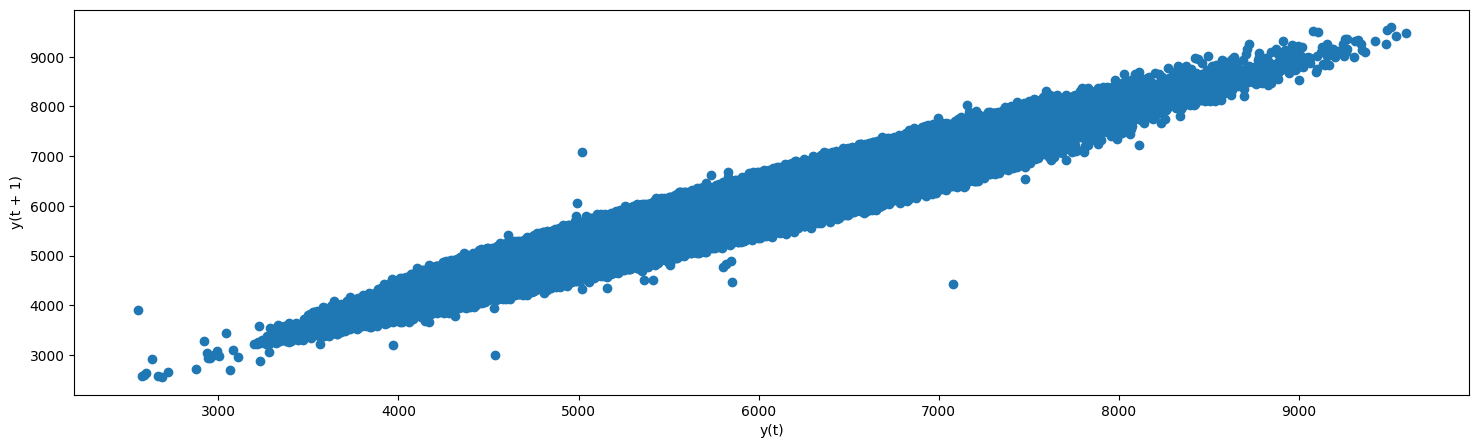

In [59]:


from pandas.plotting import lag_plot
plt.figure(figsize=(18,5))
lag_plot(df2.PJMW_MW)
plt.show()



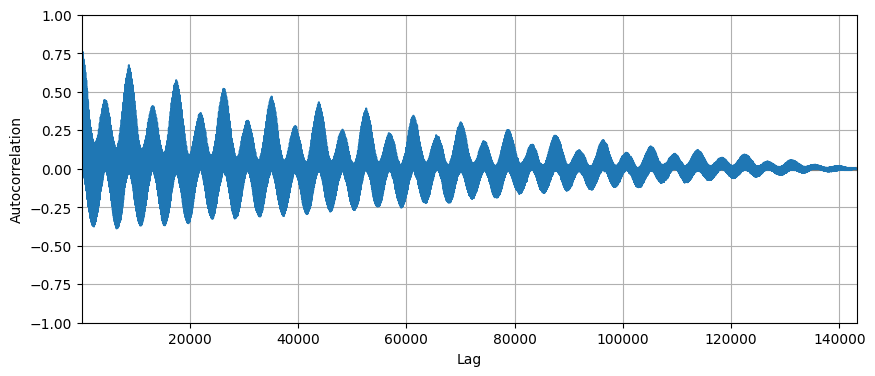

In [60]:


from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df4.PJMW_MW)
plt.show()



Mean is: 5602.40617362401


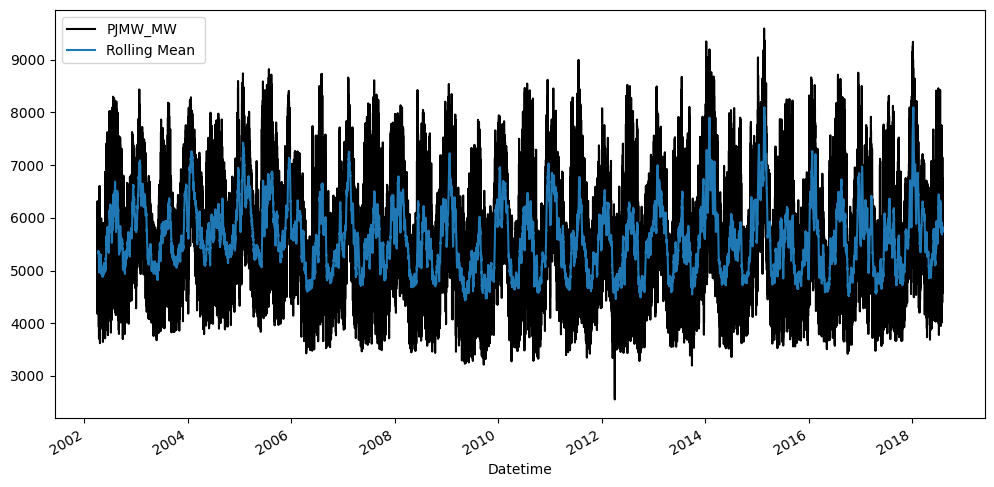

In [61]:
df.plot(figsize=(12,6), legend=True, label="Data", cmap='gray')
df["PJMW_MW"].rolling(200, center=False).mean().plot(legend=True, label="Rolling Mean ");
print("Mean is:", df["PJMW_MW"].mean())

S.D is: 979.1


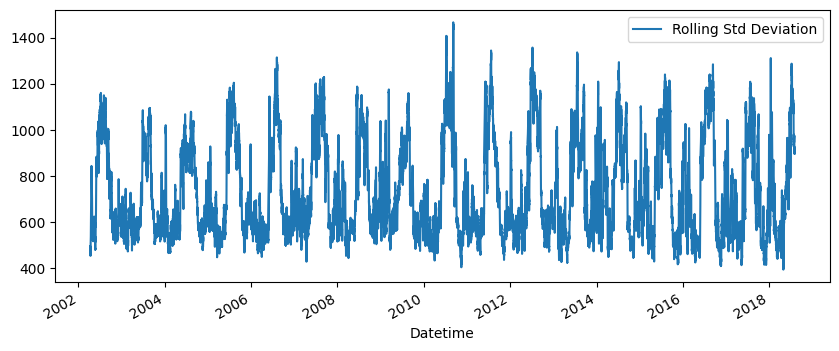

In [62]:


df["PJMW_MW"].rolling(200).std().plot(legend=True, label="Rolling Std Deviation");
print("S.D is:", df["PJMW_MW"].std().round(1))



In [63]:


cv = df["PJMW_MW"].std()/df["PJMW_MW"].mean()
cv.round(2)



0.17

CV < 0.75 Hence its a low variability process

In [64]:


from statsmodels.tsa.stattools import adfuller
dftest = adfuller(df4.PJMW_MW , autolag= 'AIC')
print("1. ADF :" , dftest[0])
print("2. P-Value :" , dftest[1])
print("3. Num of lags :" , dftest[2])
print("4. No of obs used for ADF regression and critical value calculation :" , dftest[3])
print("5. Critical Values: ")
for key, val in dftest[4].items():
    print("\t",key, ": " , val)



1. ADF : -19.90453345071103
2. P-Value : 0.0
3. Num of lags : 74
4. No of obs used for ADF regression and critical value calculation : 143131
5. Critical Values: 
	 1% :  -3.4303956883364264
	 5% :  -2.8615601935959596
	 10% :  -2.5667807483328238


/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


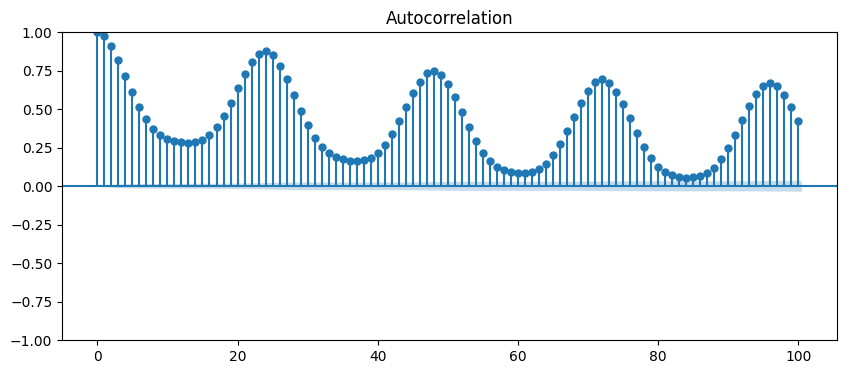

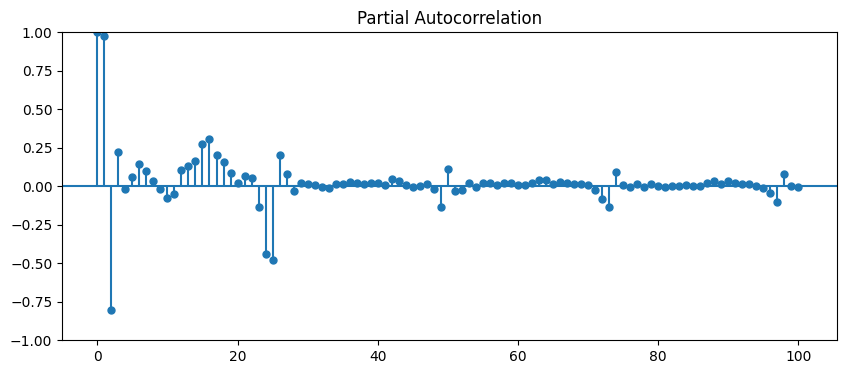

In [65]:


tsa_plots.plot_acf(df4.PJMW_MW,lags=100)
tsa_plots.plot_pacf(df4.PJMW_MW,lags=100)
plt.show()



In [66]:
daily_data = df2.resample(rule='D').mean()
daily_data = daily_data.asfreq('D')

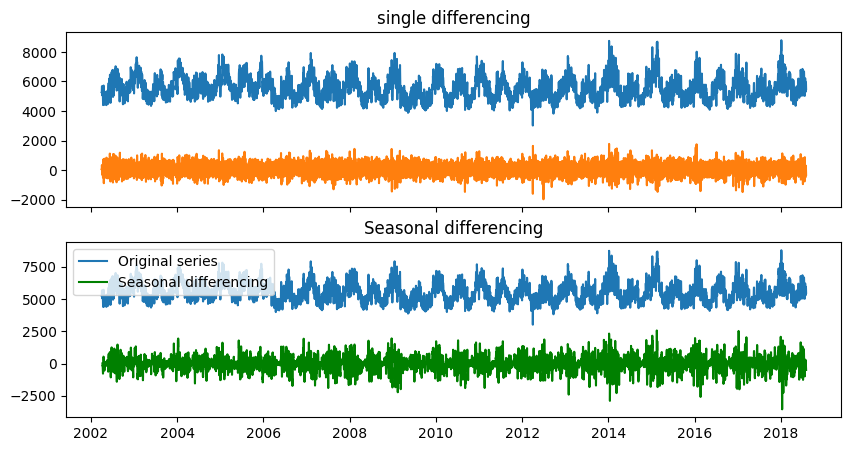

In [67]:
fig, axes = plt.subplots(2,1,figsize=(10,5),dpi=100,sharex=True)
data=daily_data.PJMW_MW
axes[0].plot(data[:], label = "Original series")
axes[0].plot(data[:].diff(1), label = "single differencing")
axes[0].set_title("single differencing")
plt.legend(loc='upper left', fontsize=10)

#Second differencing with 7 lags

axes[1].plot(data[:], label = "Original series")
axes[1].plot(data[:].diff(7), label = "Seasonal differencing",color='green')
axes[1].set_title("Seasonal differencing")
plt.legend(loc='upper left', fontsize=10)

plt.show()

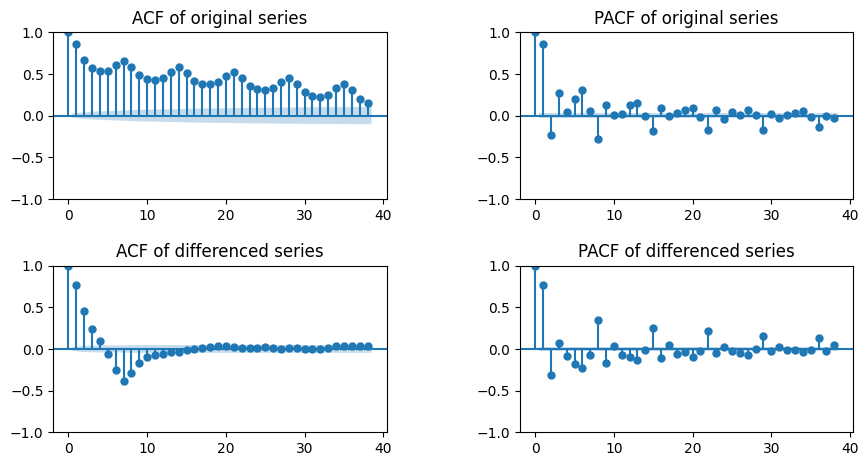

In [68]:
fig,axes = plt.subplots(2,2,figsize=(10,5))
tsa_plots.plot_acf(daily_data, ax=axes[0,0]); axes[0,0].set_title('ACF of original series')
tsa_plots.plot_pacf(daily_data, ax=axes[0,1]); axes[0,1].set_title('PACF of original series')

#differencing
tsa_plots.plot_acf(daily_data.diff(7).dropna(), ax=axes[1,0]); axes[1,0].set_title('ACF of differenced series')
tsa_plots.plot_pacf(daily_data.diff(7).dropna(), ax=axes[1,1]); axes[1,1].set_title('PACF of differenced series')

plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=0.9,wspace=0.4,hspace=0.4)

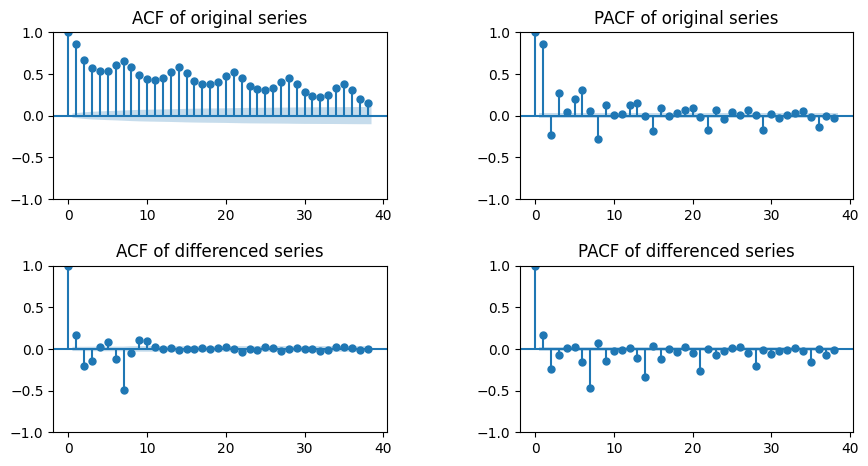

In [69]:
fig,axes = plt.subplots(2,2,figsize=(10,5))
tsa_plots.plot_acf(daily_data, ax=axes[0,0]); axes[0,0].set_title('ACF of original series')
tsa_plots.plot_pacf(daily_data, ax=axes[0,1]); axes[0,1].set_title('PACF of original series')

#differencing
tsa_plots.plot_acf(daily_data.diff(7).diff().dropna(), ax=axes[1,0]); axes[1,0].set_title('ACF of differenced series')
tsa_plots.plot_pacf(daily_data.diff(7).diff().dropna(), ax=axes[1,1]); axes[1,1].set_title('PACF of differenced series')

plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=0.9,wspace=0.4,hspace=0.4)

In [70]:
cutoff = '2017-08-04'

daily_data.sort_index()

train = daily_data[:cutoff]
test = daily_data[cutoff:]

In [71]:

train.shape,test.shape



((5605, 1), (365, 1))

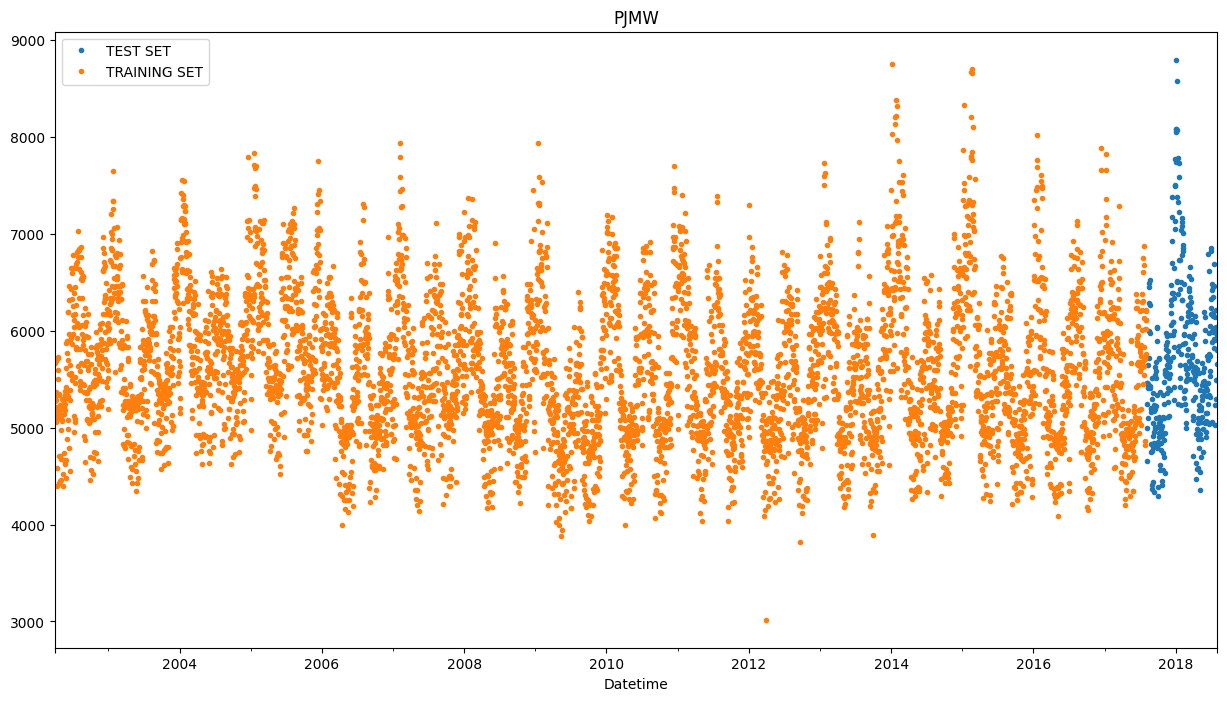

In [72]:
test.rename(columns={'PJMW_MW': 'TEST SET'}).join(train.rename(columns={'PJMW_MW': 'TRAINING SET'}),how='outer').plot(figsize=(15,8), title='PJMW', style='.')
plt.show()

/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


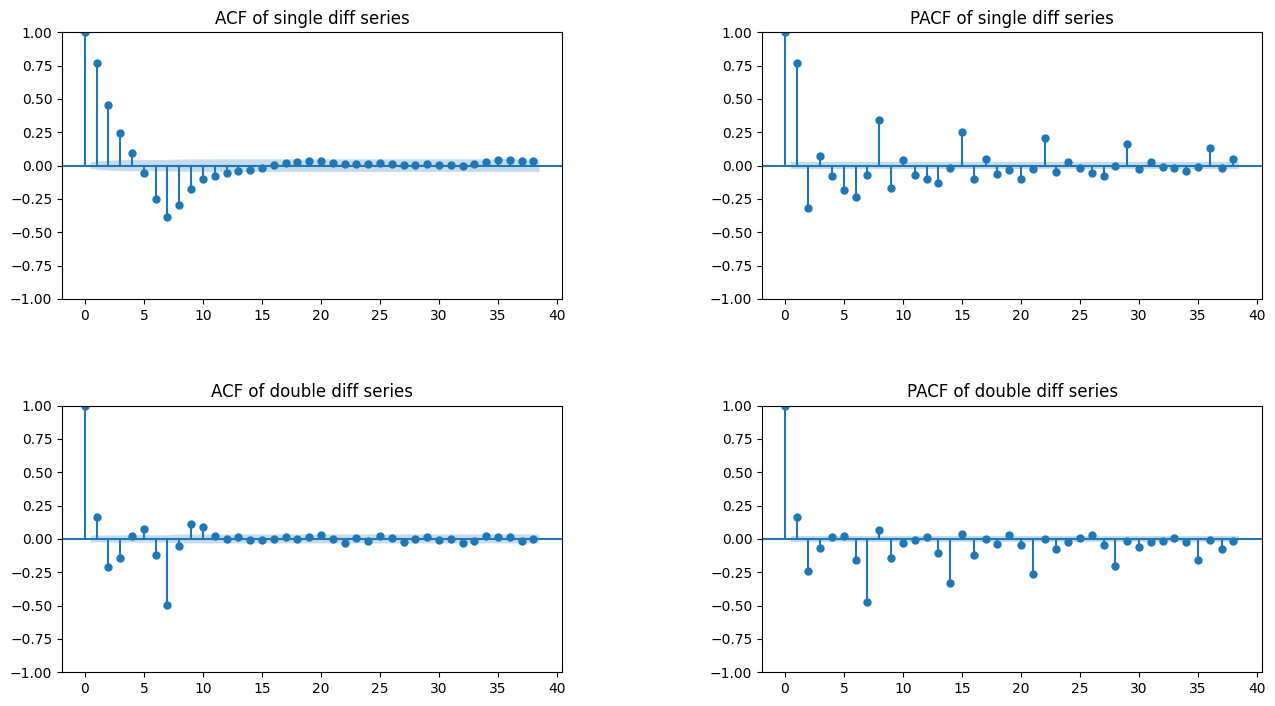

In [73]:
fig,axes = plt.subplots(2,2,figsize=(15,8))
tsa_plots.plot_acf(daily_data.diff(7).dropna(), ax=axes[0,0]); axes[0,0].set_title('ACF of single diff series')
tsa_plots.plot_pacf(daily_data.diff(7).dropna(), ax=axes[0,1]); axes[0,1].set_title('PACF of single diff series')

#differencing
tsa_plots.plot_acf(daily_data.diff(7).diff().dropna(), ax=axes[1,0]); axes[1,0].set_title('ACF of double diff series')
tsa_plots.plot_pacf(daily_data.diff(7).diff().dropna(), ax=axes[1,1]); axes[1,1].set_title('PACF of double diff series')

plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=0.9,wspace=0.4,hspace=0.4)

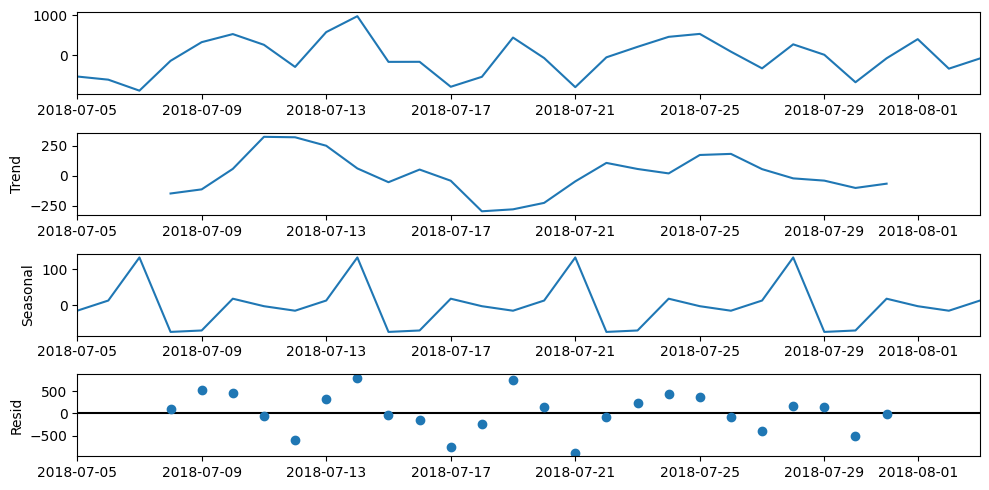

In [74]:


diff7=daily_data.diff(7).diff().dropna()
plt.rcParams['figure.figsize'] = [10, 5]
decomposition = seasonal_decompose(diff7[-30:], model='additive') # Aggregate to weekly level
decomposition.plot()
plt.show()




In [75]:


model_7=sm.tsa.statespace.SARIMAX(train,order=(1,1,3),seasonal_order=(1,1,0,7))
fitted_7 = model_7.fit(disp=-1)
print(fitted_7.summary())



/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                                     SARIMAX Results                                      
Dep. Variable:                            PJMW_MW   No. Observations:                 5605
Model:             SARIMAX(1, 1, 3)x(1, 1, [], 7)   Log Likelihood              -40300.379
Date:                            Mon, 10 Apr 2023   AIC                          80612.757
Time:                                    13:25:32   BIC                          80652.537
Sample:                                04-01-2002   HQIC                         80626.620
                                     - 08-04-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6303      0.017     37.540      0.000       0.597       0.663
ma.L1         -0.5791      1.583   

In [76]:
n_steps = 365
fc7 = fitted_7.forecast(n_steps,alpha=0.05)

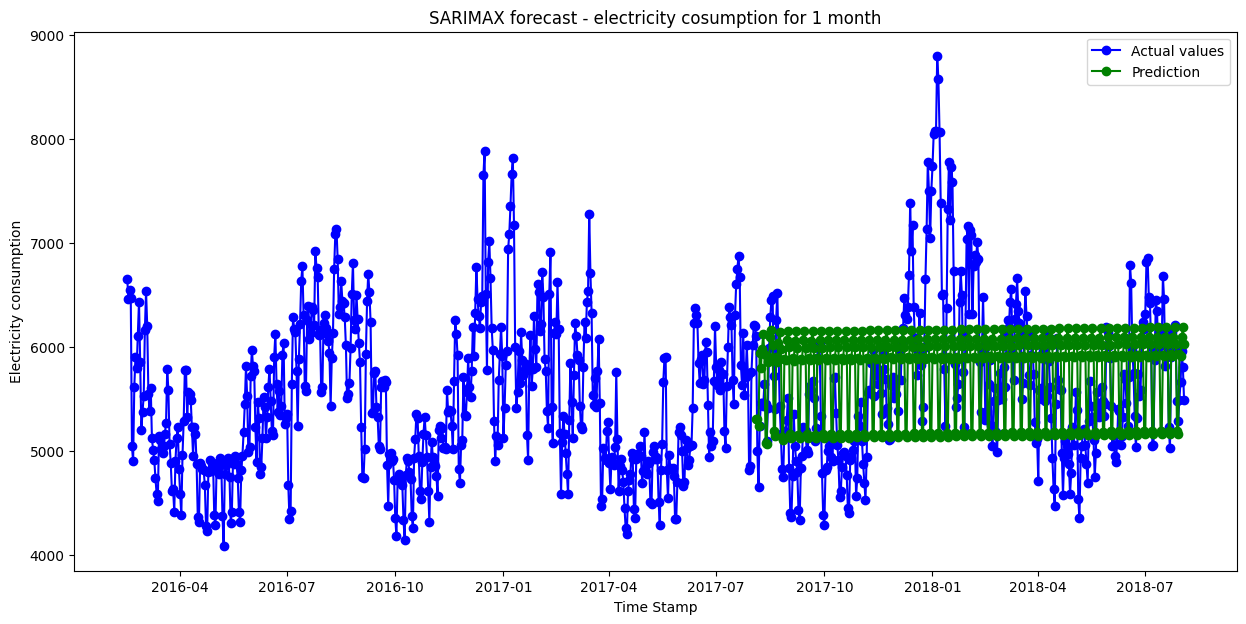

In [77]:
fitted_series7 = pd.Series(fc7,index=test.index)
fitted_series7=fitted_series7.bfill(axis ='rows')
fig, ax = plt.subplots(figsize=(15,7))
# plt.plot(daily_data)
plt.plot(daily_data[-900:].index,daily_data[-900:].values, label='Actual values', color="blue", marker="o")
plt.plot(fitted_series7[-365:].index, fitted_series7[-365:].values,label='Prediction', color="green", marker="o")

# plt.plot(fitted_series)

plt.title("SARIMAX forecast - electricity cosumption for 1 month")
plt.xlabel("Time Stamp")
plt.ylabel("Electricity consumption")
plt.legend()

plt.show()

In [78]:


def mape(forecast,actual):
    mape=round(np.mean(np.abs(forecast - actual)/np.abs(actual))*100,2)
    return mape



In [79]:


def mae(forecast,actual):
    mae=round(np.mean(np.abs(forecast - actual)),2)
    return mae



In [80]:
def rmse(forecast,actual):
    rmse = round(np.mean(np.abs(forecast - actual)**2)**.5,2)
    return rmse

In [81]:


MAPE_7= mape(fitted_series7.values, test.values)
MAE_7= mae(fitted_series7.values, test.values)
print("MAPE_7: ",MAPE_7)
print("MAE_7: ",MAE_7)



MAPE_7:  12.07
MAE_7:  684.29


In [82]:


from sklearn.metrics import mean_squared_error
from math import sqrt
rmse_7=sqrt((mean_squared_error(fitted_series7.values,test.values)))
rmse_7



767.4050008787684

/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


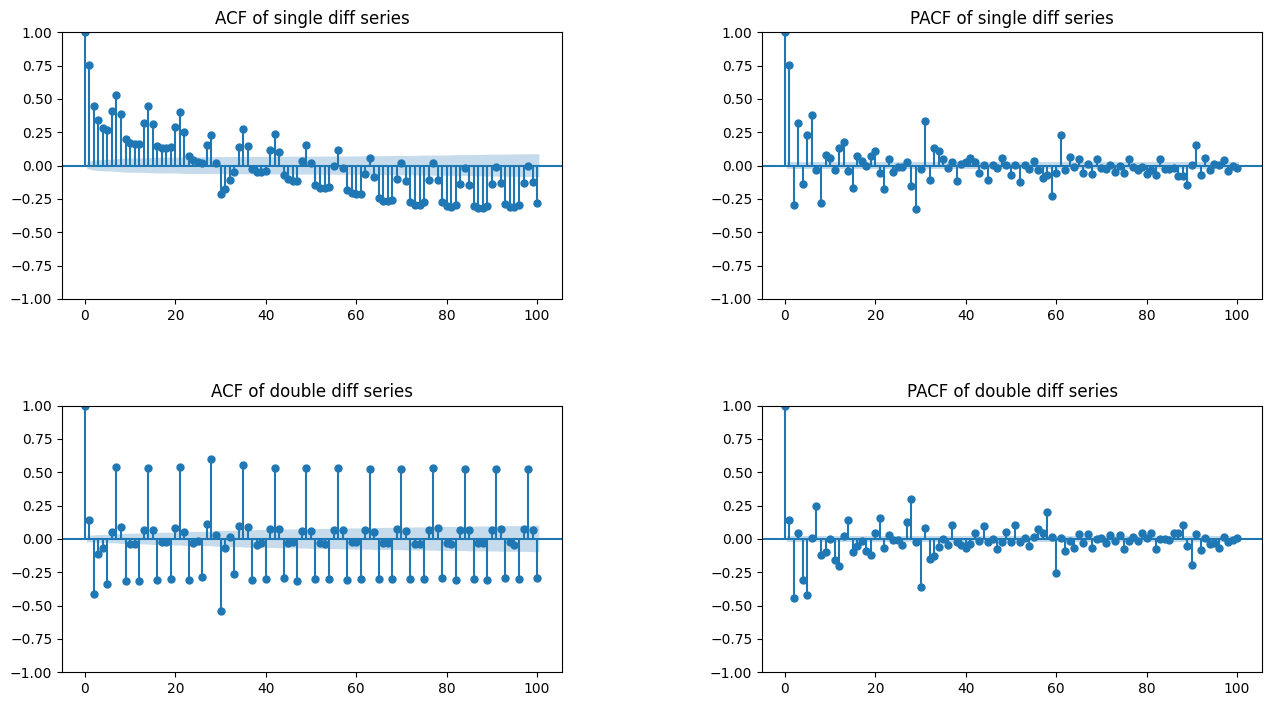

In [83]:
fig,axes = plt.subplots(2,2,figsize=(15,8))
tsa_plots.plot_acf(daily_data.diff(30).dropna(), ax=axes[0,0],lags=100); axes[0,0].set_title('ACF of single diff series')
tsa_plots.plot_pacf(daily_data.diff(30).dropna(), ax=axes[0,1],lags=100); axes[0,1].set_title('PACF of single diff series')

#differencing
tsa_plots.plot_acf(daily_data.diff(30).diff().dropna(), ax=axes[1,0],lags=100); axes[1,0].set_title('ACF of double diff series')
tsa_plots.plot_pacf(daily_data.diff(30).diff().dropna(), ax=axes[1,1],lags=100); axes[1,1].set_title('PACF of double diff series')

plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=0.9,wspace=0.4,hspace=0.4)

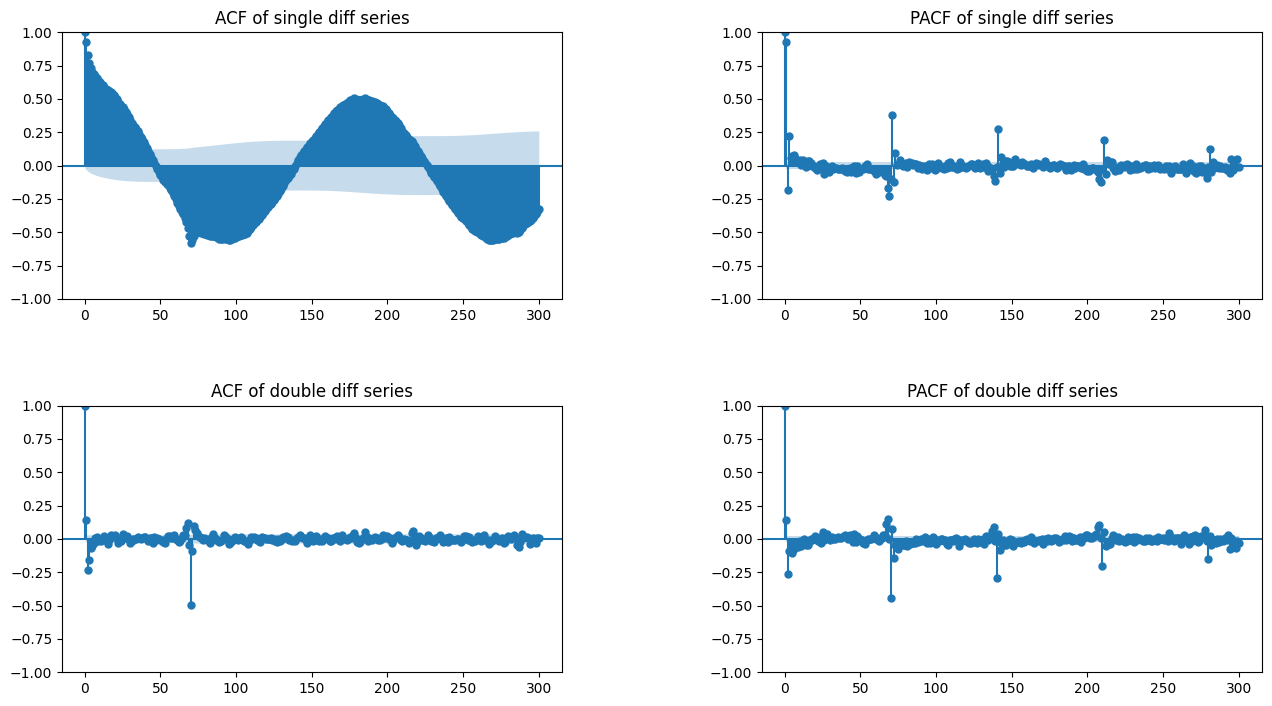

In [84]:


fig,axes = plt.subplots(2,2,figsize=(15,8))
tsa_plots.plot_acf(daily_data.diff(70).dropna(), ax=axes[0,0],lags=300); axes[0,0].set_title('ACF of single diff series')
tsa_plots.plot_pacf(daily_data.diff(70).dropna(), ax=axes[0,1],lags=300); axes[0,1].set_title('PACF of single diff series')

#differencing
tsa_plots.plot_acf(daily_data.diff(70).diff().dropna(), ax=axes[1,0],lags=300); axes[1,0].set_title('ACF of double diff series')
tsa_plots.plot_pacf(daily_data.diff(70).diff().dropna(), ax=axes[1,1],lags=300); axes[1,1].set_title('PACF of double diff series')

plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=0.9,wspace=0.4,hspace=0.4)



In [85]:
data_10year=daily_data['2008-01-01':'2017-08-03']

In [86]:


data_10year



PJMW_MW
Datetime               
2008-01-01  5657.125000
2008-01-02  6920.250000
2008-01-03  7223.416667
2008-01-04  6963.250000
2008-01-05  6016.958333
...                 ...
2017-07-30  4859.875000
2017-07-31  5757.750000
2017-08-01  6015.666667
2017-08-02  6215.958333
2017-08-03  6205.958333

[3503 rows x 1 columns]

<Axes: xlabel='Datetime'>

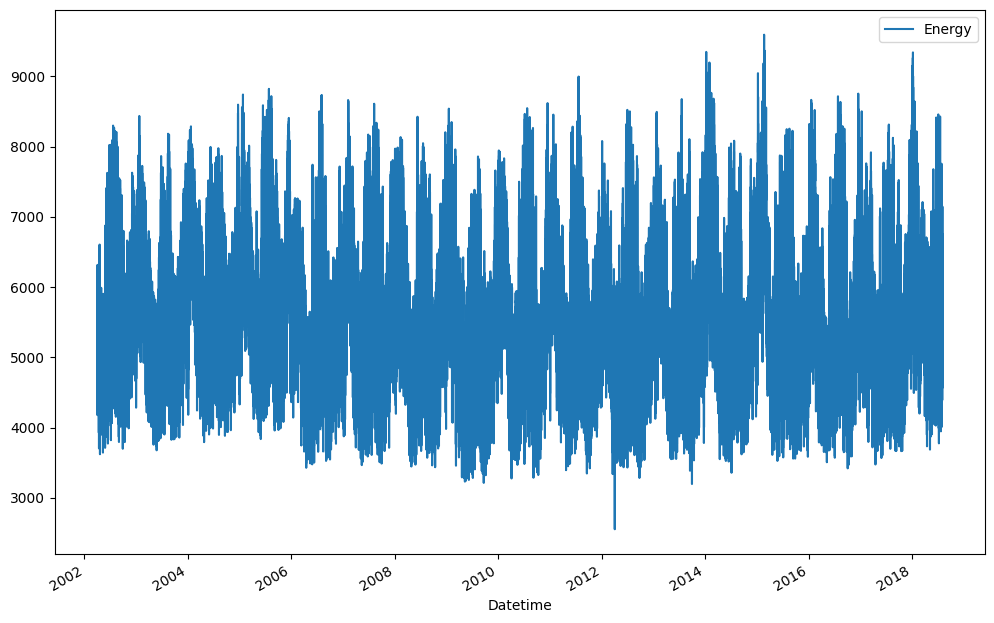

In [87]:


df.columns = ['Energy']
df.plot(figsize=(12,8))



In [88]:


daily_data = df.resample(rule='D').mean()
daily_data = daily_data.asfreq('D')



In [89]:
daily_data

Energy
Datetime               
2002-04-01  5271.173913
2002-04-02  5310.416667
2002-04-03  5325.916667
2002-04-04  5670.791667
2002-04-05  5686.125000
...                 ...
2018-07-30  5492.708333
2018-07-31  5660.750000
2018-08-01  5959.708333
2018-08-02  5805.041667
2018-08-03  5489.000000

[5969 rows x 1 columns]

In [90]:


daily_data1=daily_data.copy()



In [91]:


daily_data['energy_1dayback']=daily_data['Energy'].shift(+1)
daily_data['energy_2dayback']=daily_data['Energy'].shift(+2)
daily_data['energy_3dayback']=daily_data['Energy'].shift(+3)
daily_data['energy_4dayback']=daily_data['Energy'].shift(+4)
daily_data['energy_5dayback']=daily_data['Energy'].shift(+5)
daily_data['energy_6dayback']=daily_data['Energy'].shift(+6)
daily_data['energy_7dayback']=daily_data['Energy'].shift(+7)

daily_data.head(10)



Energy  energy_1dayback  energy_2dayback  energy_3dayback  \
Datetime                                                                     
2002-04-01  5271.173913              NaN              NaN              NaN   
2002-04-02  5310.416667      5271.173913              NaN              NaN   
2002-04-03  5325.916667      5310.416667      5271.173913              NaN   
2002-04-04  5670.791667      5325.916667      5310.416667      5271.173913   
2002-04-05  5686.125000      5670.791667      5325.916667      5310.416667   
2002-04-06  5367.791667      5686.125000      5670.791667      5325.916667   
2002-04-07  5060.652174      5367.791667      5686.125000      5670.791667   
2002-04-08  5283.875000      5060.652174      5367.791667      5686.125000   
2002-04-09  5136.083333      5283.875000      5060.652174      5367.791667   
2002-04-10  5171.666667      5136.083333      5283.875000      5060.652174   

            energy_4dayback  energy_5dayback  energy_6dayback  energy_7dayback  
Datetime                                                                        
2002-04-01              NaN              NaN              NaN              NaN  
2002-04-02              NaN              NaN              NaN              NaN  
2002-04-03              NaN              NaN              NaN              NaN  
2002-04-04              NaN              NaN              NaN              NaN  
2002-04-05      5271.173913              NaN              NaN              NaN  
2002-04-06      5310.416667      5271.173913              NaN              NaN  
2002-04-07      5325.916667      5310.416667      5271.173913              NaN  
2002-04-08      5670.791667      5325.916667      5310.416667      5271.173913  
2002-04-09      5686.125000      5670.791667      5325.916667      5310.416667  
2002-04-10      5367.791667      5686.125000      5670.791667      5325.916667

In [92]:


daily_data=daily_data.dropna()
daily_data



Energy  energy_1dayback  energy_2dayback  energy_3dayback  \
Datetime                                                                     
2002-04-08  5283.875000      5060.652174      5367.791667      5686.125000   
2002-04-09  5136.083333      5283.875000      5060.652174      5367.791667   
2002-04-10  5171.666667      5136.083333      5283.875000      5060.652174   
2002-04-11  5207.875000      5171.666667      5136.083333      5283.875000   
2002-04-12  5090.416667      5207.875000      5171.666667      5136.083333   
...                 ...              ...              ...              ...   
2018-07-30  5492.708333      5293.833333      5485.791667      5978.750000   
2018-07-31  5660.750000      5492.708333      5293.833333      5485.791667   
2018-08-01  5959.708333      5660.750000      5492.708333      5293.833333   
2018-08-02  5805.041667      5959.708333      5660.750000      5492.708333   
2018-08-03  5489.000000      5805.041667      5959.708333      5660.750000   

            energy_4dayback  energy_5dayback  energy_6dayback  energy_7dayback  
Datetime                                                                        
2002-04-08      5670.791667      5325.916667      5310.416667      5271.173913  
2002-04-09      5686.125000      5670.791667      5325.916667      5310.416667  
2002-04-10      5367.791667      5686.125000      5670.791667      5325.916667  
2002-04-11      5060.652174      5367.791667      5686.125000      5670.791667  
2002-04-12      5283.875000      5060.652174      5367.791667      5686.125000  
...                     ...              ...              ...              ...  
2018-07-30      6216.458333      6036.208333      6142.666667      5900.041667  
2018-07-31      5978.750000      6216.458333      6036.208333      6142.666667  
2018-08-01      5485.791667      5978.750000      6216.458333      6036.208333  
2018-08-02      5293.833333      5485.791667      5978.750000      6216.458333  
2018-08-03      5492.708333      5293.833333      5485.791667      5978.750000  

[5962 rows x 8 columns]

In [93]:


daily_data=daily_data.dropna()
daily_data



Energy  energy_1dayback  energy_2dayback  energy_3dayback  \
Datetime                                                                     
2002-04-08  5283.875000      5060.652174      5367.791667      5686.125000   
2002-04-09  5136.083333      5283.875000      5060.652174      5367.791667   
2002-04-10  5171.666667      5136.083333      5283.875000      5060.652174   
2002-04-11  5207.875000      5171.666667      5136.083333      5283.875000   
2002-04-12  5090.416667      5207.875000      5171.666667      5136.083333   
...                 ...              ...              ...              ...   
2018-07-30  5492.708333      5293.833333      5485.791667      5978.750000   
2018-07-31  5660.750000      5492.708333      5293.833333      5485.791667   
2018-08-01  5959.708333      5660.750000      5492.708333      5293.833333   
2018-08-02  5805.041667      5959.708333      5660.750000      5492.708333   
2018-08-03  5489.000000      5805.041667      5959.708333      5660.750000   

            energy_4dayback  energy_5dayback  energy_6dayback  energy_7dayback  
Datetime                                                                        
2002-04-08      5670.791667      5325.916667      5310.416667      5271.173913  
2002-04-09      5686.125000      5670.791667      5325.916667      5310.416667  
2002-04-10      5367.791667      5686.125000      5670.791667      5325.916667  
2002-04-11      5060.652174      5367.791667      5686.125000      5670.791667  
2002-04-12      5283.875000      5060.652174      5367.791667      5686.125000  
...                     ...              ...              ...              ...  
2018-07-30      6216.458333      6036.208333      6142.666667      5900.041667  
2018-07-31      5978.750000      6216.458333      6036.208333      6142.666667  
2018-08-01      5485.791667      5978.750000      6216.458333      6036.208333  
2018-08-02      5293.833333      5485.791667      5978.750000      6216.458333  
2018-08-03      5492.708333      5293.833333      5485.791667      5978.750000  

[5962 rows x 8 columns]

In [94]:
daily_data1.to_csv('dataset_daily.csv')

In [95]:
import numpy as np
x1,x2,x3,x4,x5,x6,x7,y=daily_data['energy_1dayback'],daily_data['energy_2dayback'],daily_data['energy_3dayback'],daily_data['energy_4dayback'],daily_data['energy_5dayback'],daily_data['energy_6dayback'],daily_data['energy_7dayback'],daily_data['Energy']
x1,x2,x3,x4,x5,x6,x7,y=np.array(x1),np.array(x2),np.array(x3),np.array(x4),np.array(x5),np.array(x6),np.array(x7),np.array(y)
x1,x2,x3,x4,x5,x6,x7,y=x1.reshape(-1,1),x2.reshape(-1,1),x3.reshape(-1,1),x4.reshape(-1,1),x5.reshape(-1,1),x6.reshape(-1,1),x7.reshape(-1,1),y.reshape(-1,1)
final_x=np.concatenate((x1,x2,x3,x4,x5,x6,x7),axis=1)
print(final_x)

[[5060.65217391 5367.79166667 5686.125      ... 5325.91666667
  5310.41666667 5271.17391304]
 [5283.875      5060.65217391 5367.79166667 ... 5670.79166667
  5325.91666667 5310.41666667]
 [5136.08333333 5283.875      5060.65217391 ... 5686.125
  5670.79166667 5325.91666667]
 ...
 [5660.75       5492.70833333 5293.83333333 ... 5978.75
  6216.45833333 6036.20833333]
 [5959.70833333 5660.75       5492.70833333 ... 5485.79166667
  5978.75       6216.45833333]
 [5805.04166667 5959.70833333 5660.75       ... 5293.83333333
  5485.79166667 5978.75      ]]


In [96]:
final_x

array([[5060.65217391, 5367.79166667, 5686.125     , ..., 5325.91666667,
        5310.41666667, 5271.17391304],
       [5283.875     , 5060.65217391, 5367.79166667, ..., 5670.79166667,
        5325.91666667, 5310.41666667],
       [5136.08333333, 5283.875     , 5060.65217391, ..., 5686.125     ,
        5670.79166667, 5325.91666667],
       ...,
       [5660.75      , 5492.70833333, 5293.83333333, ..., 5978.75      ,
        6216.45833333, 6036.20833333],
       [5959.70833333, 5660.75      , 5492.70833333, ..., 5485.79166667,
        5978.75      , 6216.45833333],
       [5805.04166667, 5959.70833333, 5660.75      , ..., 5293.83333333,
        5485.79166667, 5978.75      ]])

In [97]:
y

array([[5283.875     ],
       [5136.08333333],
       [5171.66666667],
       ...,
       [5959.70833333],
       [5805.04166667],
       [5489.        ]])

In [98]:


X_train,X_test,y_train,y_test=final_x[:-360],final_x[-360:],y[:-360],y[-360:]



In [99]:


from sklearn.linear_model import LinearRegression
lin_model=LinearRegression()



In [100]:


from sklearn.ensemble import RandomForestRegressor
ran_model=RandomForestRegressor(n_estimators=100,max_features=3, random_state=1)



In [101]:


ran_model.fit(X_train,y_train)
lin_model.fit(X_train,y_train)



<ipython-input-101-e908c869f6e6>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  ran_model.fit(X_train,y_train)


LinearRegression()

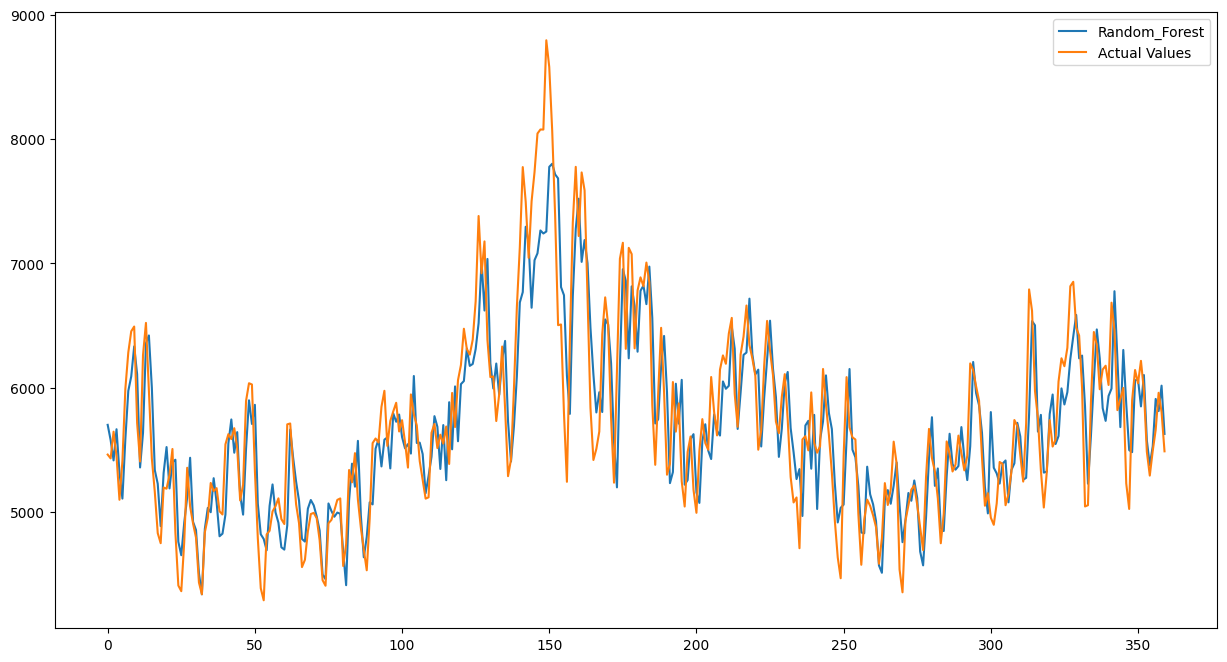

In [102]:


ran_pred=ran_model.predict(X_test)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,8)
plt.plot(ran_pred,label='Random_Forest')
plt.plot(y_test,label='Actual Values')
plt.legend(loc="upper right")
plt.show()



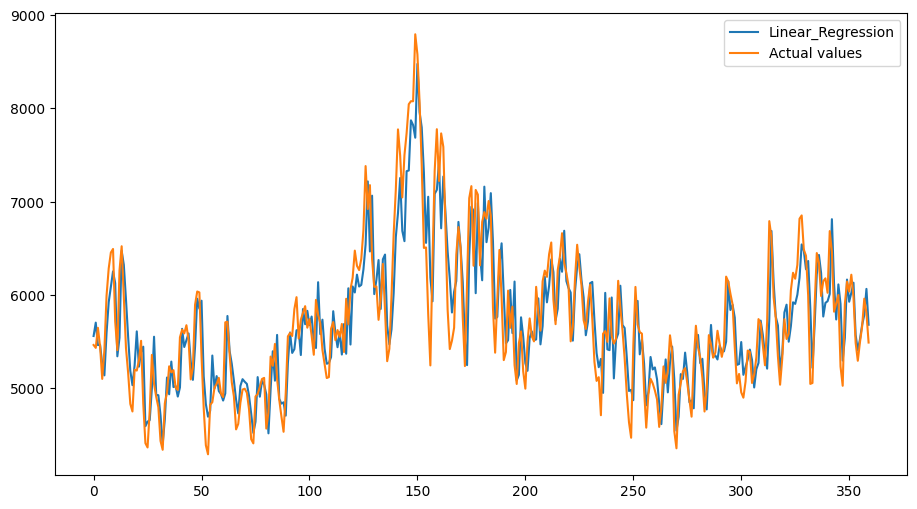

In [103]:


lin_pred=lin_model.predict(X_test)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (11,6)
plt.plot(lin_pred,label='Linear_Regression')
plt.plot(y_test,label='Actual values')
plt.legend(loc="upper right")
plt.show()



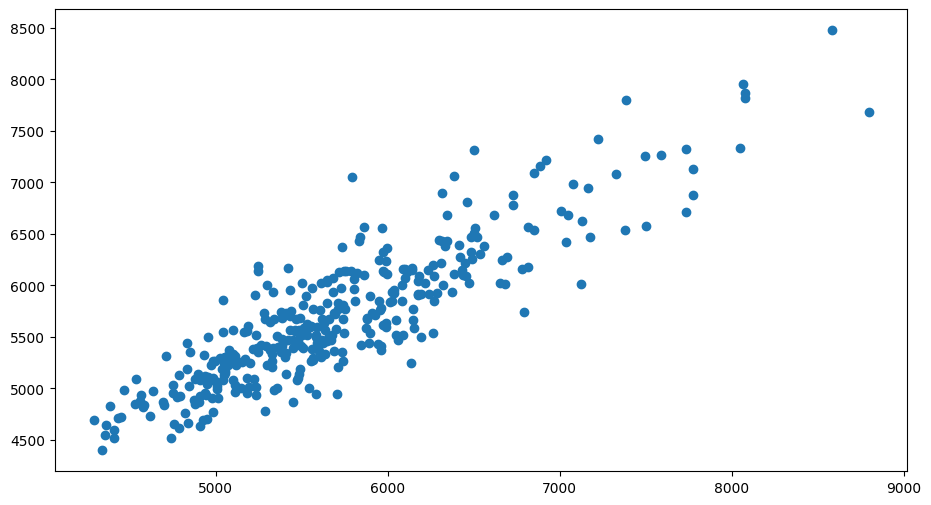

In [104]:


plt.scatter(y_test,lin_pred)



In [105]:
residual = y_test-lin_pred

<ipython-input-106-500ceea62e43>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residual)


<Axes: ylabel='Density'>

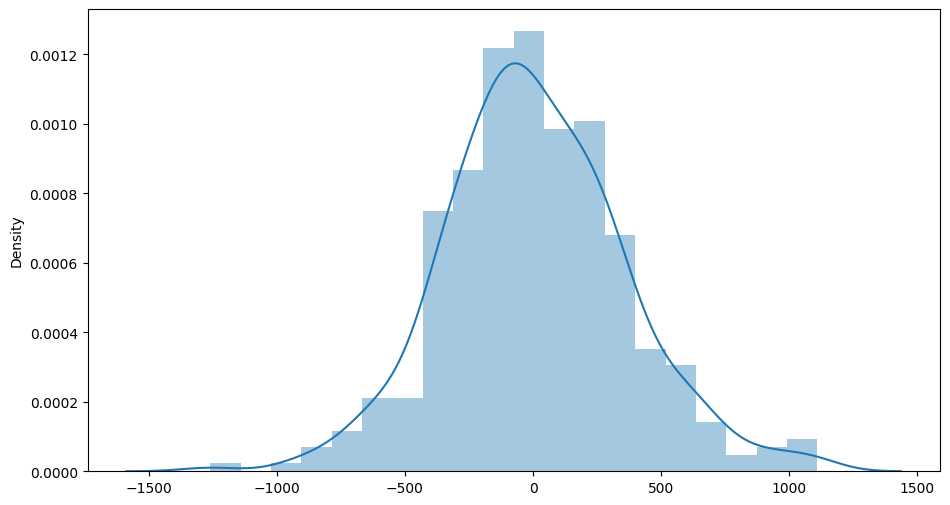

In [106]:


sns.distplot(residual)



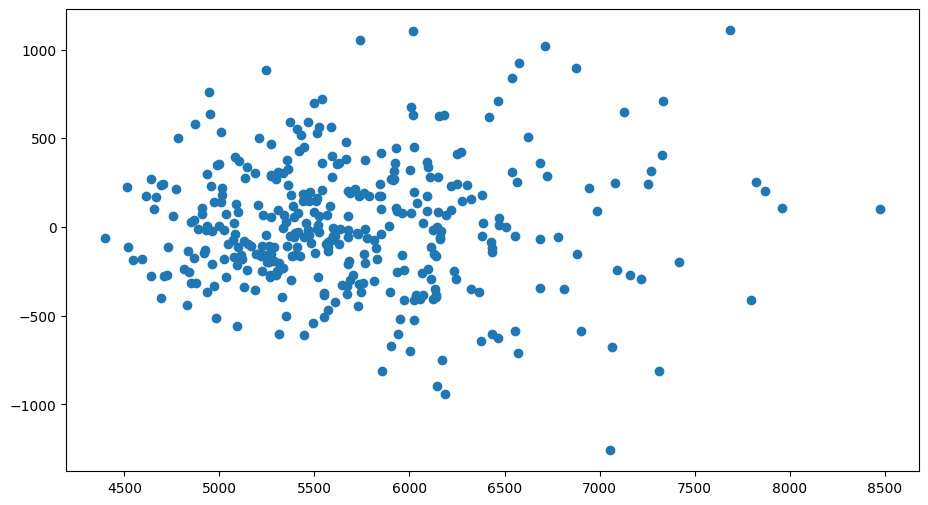

In [107]:


plt.scatter(lin_pred,residual)



In [108]:
from xgboost import XGBRegressor

In [109]:


xg_model = XGBRegressor()



In [110]:
xg_model.fit(X_train, y_train, verbose=False)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [111]:


predictions = xg_model.predict(X_test)



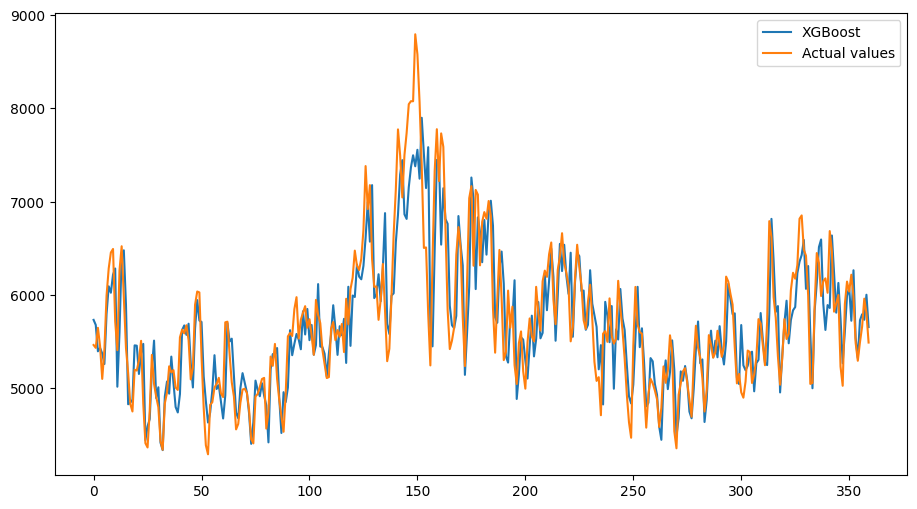

In [112]:


import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (11,6)
plt.plot(predictions,label='XGBoost')
plt.plot(y_test,label='Actual values')
plt.legend(loc="upper right")
plt.show()



In [113]:
from sklearn.metrics import mean_squared_error, mean_absolute_error , mean_absolute_percentage_error
from math import sqrt

RMSE_RF=sqrt(mean_squared_error(ran_pred,y_test))
RMSE_LR=sqrt(mean_squared_error(lin_pred,y_test))
MAE_RF = mean_absolute_error(ran_pred,y_test)
MAE_LR = mean_absolute_error(lin_pred,y_test)
MAPE_RF = round((mean_absolute_percentage_error(ran_pred,y_test)*100),3)
MAPE_LR = round((mean_absolute_percentage_error(lin_pred,y_test)*100),3)
MAE_XG = mean_absolute_error(y_test, predictions)
MAPE_XG= round((mean_absolute_percentage_error(y_test,predictions)*100),3)
RMSE_xg=sqrt(mean_squared_error(predictions,y_test))

In [114]:


print('RMSE for Random Forest Model is:',RMSE_RF)
print('MAE for Random Forest Model is:',MAE_RF)
print('MAPE for Random Forest Model is:',MAPE_RF)



RMSE for Random Forest Model is: 368.3095458814925
MAE for Random Forest Model is: 284.3967825935989
MAPE for Random Forest Model is: 4.902


In [115]:


print('RMSE for Linear Regression Model is:',RMSE_LR)
print('MAE for Linear Regression Model is:',MAE_LR)
print('MAPE for Linear Regression Model is:',MAPE_LR)



RMSE for Linear Regression Model is: 354.2212769516723
MAE for Linear Regression Model is: 274.3272625521233
MAPE for Linear Regression Model is: 4.767


In [116]:
print('RMSE for XG Boost Model is:',RMSE_xg)
print('MAE for XG Boos Model is:',MAE_XG)
print('MAPE for XG Boos Model is:',MAPE_XG)


RMSE for XG Boost Model is: 389.64000301919805
MAE for XG Boos Model is: 289.1367964378271
MAPE for XG Boos Model is: 4.935



Calculate forecasting accuracy

In [117]:


from sklearn.linear_model import LinearRegression
final_lin_model=LinearRegression()

final_lin_model.fit(final_x,y)



LinearRegression()

In [118]:
forecast_check_data = np.array(daily_data['Energy'][:'2018-07-04'][-7:])

In [119]:
z=forecast_check_data

for i in range(0,30):
    ck=z[-7:]
    ck=np.array([ck])
    lin_f_chk=final_lin_model.predict(ck)
    z=np.append(z,lin_f_chk)
    i=+1
future_pred_lr=z[-30:]



In [120]:


future_pred_lr



array([6087.19208684, 6215.37561513, 6141.79713583, 6140.94080727,
       6521.6823898 , 6673.31313463, 6625.97936142, 6130.07239028,
       6231.21147145, 6129.15855271, 6053.95806559, 6329.09364364,
       6399.23273863, 6700.25638049, 6123.65542429, 6287.32664277,
       6113.61968488, 6007.7711613 , 6270.45870661, 6066.1917365 ,
       6764.64785011, 6014.86767056, 6390.9801974 , 6085.95259851,
       5947.14689682, 6368.77008947, 5659.52798074, 6916.71514721,
       5744.18581509, 6563.28834576])

In [121]:


future_chk = pd.date_range('2018-07-05','2018-08-03', freq='D')
future_chk_df = pd.DataFrame(index=future_chk)



In [122]:
future_chk_df['future_chk_energy'] = future_pred_lr.tolist()

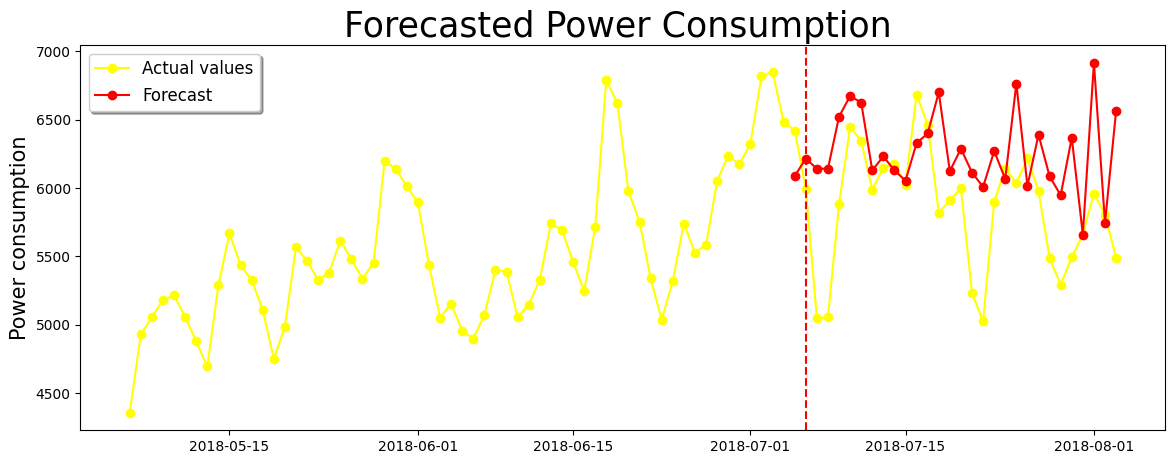

In [123]:
plt.figure(figsize=(14,5))
plt.title("Forecasted Power Consumption ", fontsize=25)

plt.plot(daily_data1[-90:].index,daily_data1[-90:].values, label='Actual values', color="yellow", marker="o")

plt.plot(future_chk_df.index,future_chk_df.values, label='Forecast', color="red", marker="o")
plt.axvline(future_chk_df.index[1], color="red", linestyle="--")
plt.legend(fontsize=12, fancybox=True, shadow=True, frameon=True)
plt.ylabel('Power consumption', fontsize=15)
plt.show()

In [124]:


daily_data_last_30 = daily_data['Energy'].tail(30)



In [125]:


MAE_check = mean_absolute_error(daily_data_last_30, future_chk_df)
MAPE_check= round((mean_absolute_percentage_error(daily_data_last_30,future_chk_df)*100),3)
RMSE_check=sqrt(mean_squared_error(future_chk_df,daily_data_last_30))



In [126]:


print('RMSE for forecast check is:',RMSE_check)
print('MAE for forecast check is:',MAE_check)
print('MAPE for forecast check is:',MAPE_check)



RMSE for forecast check is: 588.807686109385
MAE for forecast check is: 462.23369796565714
MAPE for forecast check is: 8.262


RANDOM FOREST 

In [127]:
from sklearn.ensemble import RandomForestRegressor
final_RF_model=RandomForestRegressor(n_estimators=100,max_features=3, random_state=1)

In [128]:


final_RF_model.fit(final_x,y)



<ipython-input-128-b083085282b7>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  final_RF_model.fit(final_x,y)


RandomForestRegressor(max_features=3, random_state=1)

In [129]:


z=forecast_check_data

for i in range(0,30):
    ck=z[-7:]
    ck=np.array([ck])
    rf_f_chk=final_RF_model.predict(ck)
    z=np.append(z,rf_f_chk)
    i=+1
future_pred_RF=z[-30:]



In [130]:


future_pred_RF



array([5955.01666667, 6138.51416667, 6041.71      , 6250.38541667,
       6572.80708333, 6749.12541667, 6471.195     , 5985.08833333,
       6245.1775    , 5880.73416667, 6035.02458333, 6225.56125   ,
       6656.49333333, 6523.28458333, 5858.46958333, 6239.65708333,
       5741.29333333, 6027.04637681, 6090.17333333, 6619.66125   ,
       6619.12041667, 5843.30708333, 6326.49213768, 5673.43958333,
       6056.69041667, 5761.31762681, 6484.09416667, 6600.89125   ,
       5791.37416667, 6474.48916667])

In [131]:


future_chk_rf = pd.date_range('2018-07-05','2018-08-03', freq='D')
future_chk_df_rf = pd.DataFrame(index=future_chk_rf)
future_chk_df_rf['future_chk_energy'] = future_pred_RF.tolist()



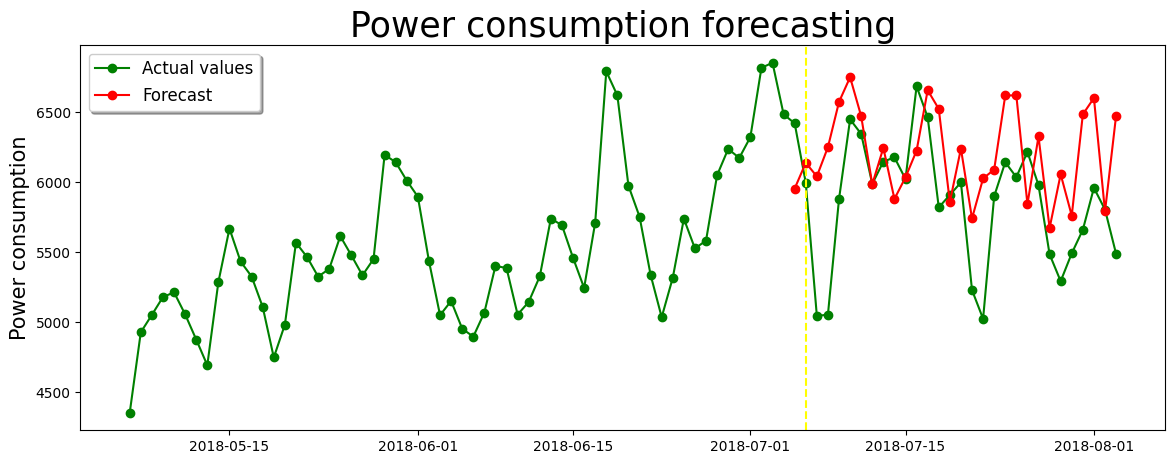

In [132]:


plt.figure(figsize=(14,5))
plt.title("Power consumption forecasting", fontsize=25)

plt.plot(daily_data1[-90:].index,daily_data1[-90:].values, label='Actual values', color="green", marker="o")

plt.plot(future_chk_df_rf.index,future_chk_df_rf.values, label='Forecast', color="red", marker="o")
plt.axvline(future_chk_df_rf.index[1], color="yellow", linestyle="--")
plt.legend(fontsize=12, fancybox=True, shadow=True, frameon=True)
plt.ylabel('Power consumption', fontsize=15)
plt.show()



In [133]:


MAE_rf_check = mean_absolute_error(daily_data_last_30, future_chk_df_rf)
MAPE_rf_check= round((mean_absolute_percentage_error(daily_data_last_30,future_chk_df_rf)*100),3)
RMSE_rf_check=sqrt(mean_squared_error(future_chk_df_rf,daily_data_last_30))
print('RMSE for RF forecast check is:',RMSE_rf_check)
print('MAE for RF forecast check is:',MAE_rf_check)
print('MAPE for RF forecast check is:',MAPE_rf_check)



RMSE for RF forecast check is: 548.3188867376956
MAE for RF forecast check is: 438.01912137681114
MAPE for RF forecast check is: 7.775


In [134]:


from xgboost import XGBRegressor
final_xg_model = XGBRegressor()
final_xg_model.fit(final_x,y, verbose=False)



XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [135]:


z=forecast_check_data

for i in range(0,30):
    ck=z[-7:]
    ck=np.array([ck])
    xgb_f_chk=final_xg_model.predict(ck)
    z=np.append(z,xgb_f_chk)
    i=+1
future_pred_XGB=z[-30:]



In [136]:
future_pred_XGB

array([6391.80273438, 5969.26708984, 6240.56005859, 6075.16748047,
       6417.76269531, 6666.03271484, 6382.23925781, 6469.29150391,
       5906.15966797, 6322.31152344, 5759.19384766, 6349.22314453,
       6611.12255859, 6248.74169922, 6604.79785156, 5940.28125   ,
       6564.03613281, 6074.37988281, 6225.16894531, 6605.22949219,
       5882.62451172, 6788.53613281, 5609.30615234, 6464.17919922,
       5791.44042969, 5922.68261719, 6380.29394531, 5563.1328125 ,
       7135.53417969, 4825.04638672])

In [137]:


future_chk_xgb = pd.date_range('2018-07-05','2018-08-03', freq='D')
future_chk_df_xgb = pd.DataFrame(index=future_chk_xgb)
future_chk_df_xgb['future_chk_energy'] = future_pred_XGB.tolist()



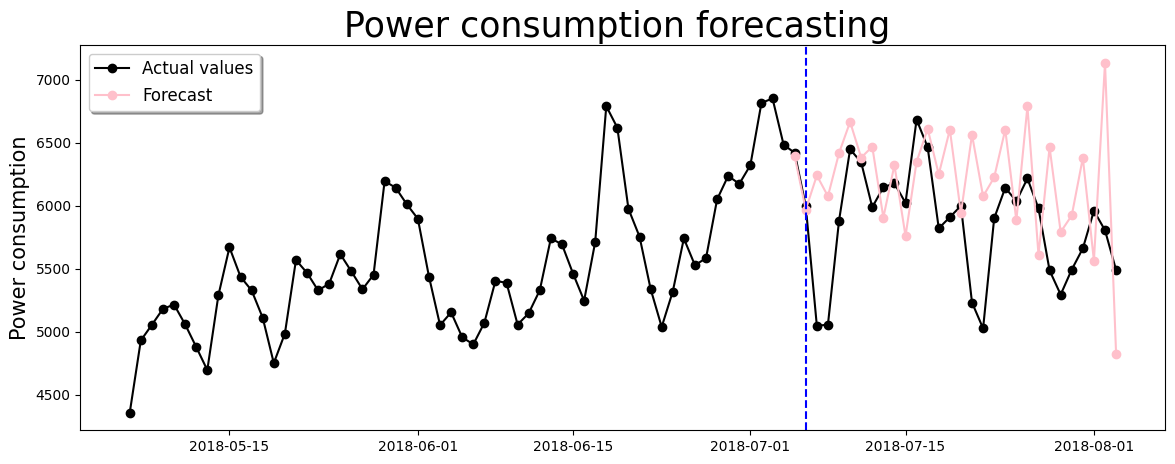

In [138]:


plt.figure(figsize=(14,5))
plt.title("Power consumption forecasting ", fontsize=25)

plt.plot(daily_data1[-90:].index,daily_data1[-90:].values, label='Actual values', color="black", marker="o")

plt.plot(future_chk_df_xgb.index,future_chk_df_xgb.values, label='Forecast', color="pink", marker="o")
plt.axvline(future_chk_df_xgb.index[1], color="blue", linestyle="--")
plt.legend(fontsize=12, fancybox=True, shadow=True, frameon=True)
plt.ylabel('Power consumption', fontsize=15)
plt.show()



In [139]:
MAE_xgb_check = mean_absolute_error(daily_data_last_30, future_chk_df_xgb)
MAPE_xgb_check= round((mean_absolute_percentage_error(daily_data_last_30,future_chk_df_xgb)*100),3)
RMSE_xgb_check=sqrt(mean_squared_error(future_chk_df_xgb,daily_data_last_30))
print('RMSE for XGB forecast check is:',RMSE_xgb_check)
print('MAE for XGB forecast check is:',MAE_xgb_check)
print('MAPE for XGB forecast check is:',MAPE_xgb_check)

RMSE for XGB forecast check is: 631.1850145995464
MAE for XGB forecast check is: 504.6309678819444
MAPE for XGB forecast check is: 9.023


FORECAST

In [140]:


from sklearn.ensemble import RandomForestRegressor
final_RF_model=RandomForestRegressor(n_estimators=100,max_features=3, random_state=1)



In [141]:


final_RF_model.fit(final_x,y)



<ipython-input-141-b083085282b7>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  final_RF_model.fit(final_x,y)


RandomForestRegressor(max_features=3, random_state=1)

In [142]:


daily_data_last_7 = np.array(daily_data['Energy'].tail(7))
daily_data_last_7



array([5485.79166667, 5293.83333333, 5492.70833333, 5660.75      ,
       5959.70833333, 5805.04166667, 5489.        ])

In [143]:


np.savetxt("daily_data_last_7.csv", daily_data_last_7, delimiter=",")



In [144]:


z=daily_data_last_7

for i in range(0,30):
    r=z[-7:]
    r=np.array([r])
    ranf_f=final_RF_model.predict(r)
    z=np.append(z,ranf_f)
    i=+1
future_pred=z[-30:]



In [145]:


future_pred



array([5805.47875   , 5250.39625   , 5549.29594203, 5510.73666667,
       5840.07      , 5759.41541667, 5566.58713768, 5990.72833333,
       5282.42625   , 5849.89      , 5319.90833333, 5782.97083333,
       5701.99833333, 5539.37463768, 6063.48541667, 5293.225     ,
       5848.77666667, 5237.80128623, 5781.37      , 5712.07208333,
       5502.78416667, 6005.81625   , 5266.59083333, 5932.14208333,
       5241.81958333, 5781.02791667, 5719.37083333, 5523.63182971,
       6040.47458333, 5221.98791667])

In [146]:
future = pd.date_range('2018-08-04','2018-09-02', freq='D')
future_df = pd.DataFrame(index=future)

In [147]:


future_df['future_energy'] = future_pred.tolist()



In [148]:


print(future_df)



            future_energy
2018-08-04    5805.478750
2018-08-05    5250.396250
2018-08-06    5549.295942
2018-08-07    5510.736667
2018-08-08    5840.070000
2018-08-09    5759.415417
2018-08-10    5566.587138
2018-08-11    5990.728333
2018-08-12    5282.426250
2018-08-13    5849.890000
2018-08-14    5319.908333
2018-08-15    5782.970833
2018-08-16    5701.998333
2018-08-17    5539.374638
2018-08-18    6063.485417
2018-08-19    5293.225000
2018-08-20    5848.776667
2018-08-21    5237.801286
2018-08-22    5781.370000
2018-08-23    5712.072083
2018-08-24    5502.784167
2018-08-25    6005.816250
2018-08-26    5266.590833
2018-08-27    5932.142083
2018-08-28    5241.819583
2018-08-29    5781.027917
2018-08-30    5719.370833
2018-08-31    5523.631830
2018-09-01    6040.474583
2018-09-02    5221.987917


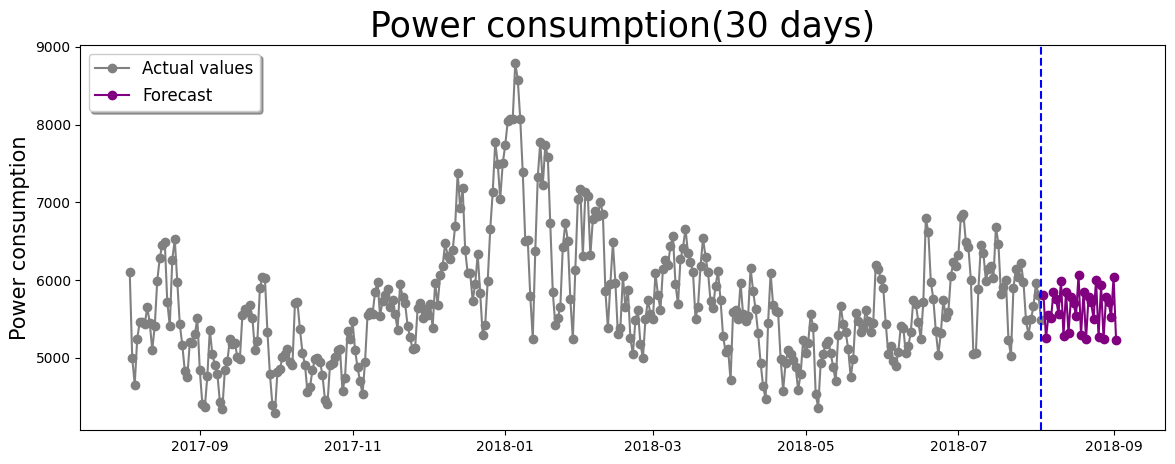

In [149]:
plt.figure(figsize=(14,5))
plt.title("Power consumption(30 days)", fontsize=25)

plt.plot(daily_data1[-365:].index,daily_data1[-365:].values, label='Actual values', color="grey", marker="o")

plt.plot(future_df.index,future_df.values, label='Forecast', color="purple", marker="o")
plt.axvline(daily_data1.index[-1], color="blue", linestyle="--")
plt.legend(fontsize=12, fancybox=True, shadow=True, frameon=True)
plt.ylabel('Power consumption', fontsize=15)
plt.show()

In [150]:


import pickle



In [151]:


filename = 'final_rf_model.pkl'
pickle.dump(final_RF_model, open(filename,'wb'))



In [152]:
pickled_model=pickle.load(open('final_rf_model.pkl','rb'))

In [153]:


pk=pickled_model.predict(X_test)

